<span style='background :#fcf2f2; font-size: 16px;color:#644faf  '><strong> Ejercicio para Candidatos <br> Autor: Pablo Veloz M.<strong> 
</table></span>

__1. CASO DE ESTUDIO__: En la siguiente pestaña encontrarás los datos de compra por hogar de la categoría de limpiadores, cada  inea representa una compra y contiene los datos correspondientes de dicha compra. Analiza las variables que se encuentran en la pestaña DB (Data base) Realiza los cruces con el programa de tu preferencia y responde las preguntas abajo formuladas. Cómo Plus puedes agregar alguna visualización de la data en PowerBI.

__PREGUNTAS__:
* Existe algun subproducto que haya destacado por el contexto pandemia?						
* Realiza un comparativo del precio comparando los países de Centroamérica.
* Identifica los outliers (actos atípicos) en las variables Valor y Volumen.						
* Comenta sobre los resultados encontrados, el cambio en tendencias, hallazgos que hayas que hayas hecho.
* Adjuntar en el correo el archivo de excel, el scropt y si es que lo hubiera archivo PowerBI resultante. 						

### 2. Librerias

In [35]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import seaborn as sns
import matplotlib.patches as mpatches
import squarify
from pywaffle import Waffle

In [36]:
plt.style.use('seaborn-paper')

### 3. Featuring Engineering

__3.1 Conexión Dataframe__

In [37]:
df = pd.read_excel('Ejercicio para candidatos.xlsx',sep='',sheet_name='DB',encoding = "ISO-8859-1")

In [38]:
df.head()

,Acto de compra,Año,Mes,Pais,Región,Artículo,Categoria,SubProduto,Fabricante,Marca,Forma_Compra,Canal de compra,Gramaje (gr. o ml.),Precio_moneda local País,Precio_dolar,Precio medio,Quantidad comprada,Volumen,Valor
0,35771121,2019,5,Total Panamá,Centro Panamá,310924,Limpiadores,Líquido,GRUPO SALPA,409 (GRUPO SALPA),Unitario,Extra,946,4.18,4.18,0.004419,1,0.892835,0.003945
1,35771218,2019,5,Total Panamá,Occidente Panamá,274594,Limpiadores,Líquido,GRUPO SALPA,409 (GRUPO SALPA),Unitario,Super 99,473,2.99,2.99,0.006321,1,0.477115,0.003016
2,36058739,2019,5,Total Panamá,Occidente Panamá,322864,Limpiadores,Líquido,GRUPO SALPA,409 (GRUPO SALPA),Unitario,Super Carnes,500,2.23,2.23,0.004460,1,0.846450,0.003775
3,35772338,2019,5,Total Panamá,Centro Panamá,284061,Limpiadores,Líquido,GRUPO SALPA,409 (GRUPO SALPA),Unitario,Super 99,946,4.25,4.25,0.004493,1,1.660798,0.007461
4,35771296,2019,5,Total Panamá,Occidente Panamá,274594,Limpiadores,Líquido,GRUPO SALPA,409 (GRUPO SALPA),Unitario,El Machetazo,473,2.79,2.79,0.005899,1,1.771622,0.010450


__3.2 Identificación de datos perdidos__

- Al analizar el conjunto de datos no se encontraron datos perdidos, y la cantidad de datos del dataset es de 35.584. La siguiente gráfica, refleja este hecho:

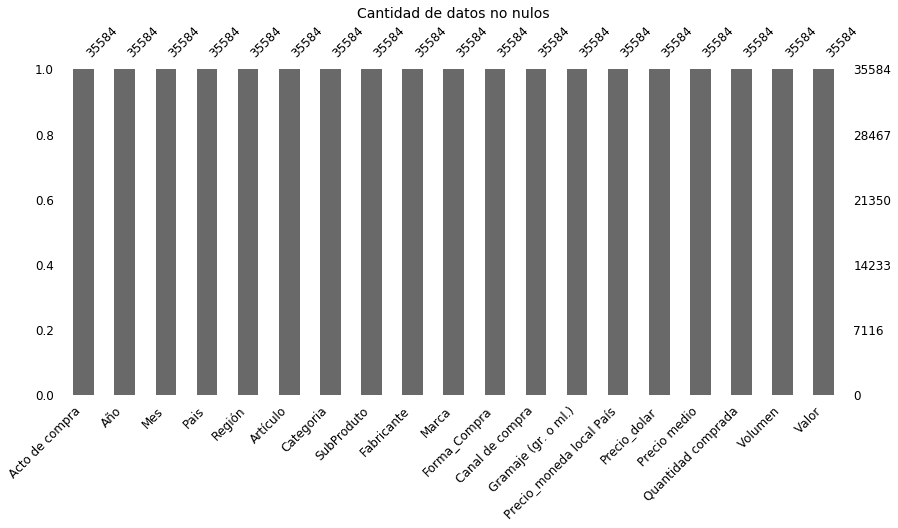

In [39]:
plt.title('Cantidad de datos no nulos', fontsize = 14)
msno.bar(df,figsize = (14,6), fontsize = 12)
plt.show()

__3.3 Recodificando valores únicos de algunas columnas__

#### 3.3.1. Columna Año

In [40]:
df['Año'].unique()

array([2019, 2020], dtype=int64)

#### 3.3.2. Columna Mes

In [41]:
df['Mes'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

#### 3.3.3. Columna País

In [42]:
df['Pais'].unique()

array([' Total Panamá ', ' Total Honduras ', ' Total Guatemala ',
       ' Total Nicaragua ', ' Total Costa Rica ', ' Total El Salvador '],
      dtype=object)

In [43]:
df.Pais=df.Pais.replace(' Total Panamá ',"Panamá")
df.Pais=df.Pais.replace(' Total Honduras ',"Honduras")
df.Pais=df.Pais.replace(' Total Guatemala ',"Guatemala")
df.Pais=df.Pais.replace(' Total Nicaragua ',"Nicaragua")
df.Pais=df.Pais.replace(' Total Costa Rica ',"Costa Rica")
df.Pais=df.Pais.replace(' Total El Salvador ',"El Salvador")

#### 3.3.4. Columna Región

In [44]:
df['Región'].unique()

array([' \xa0 Centro Panamá ', ' \xa0 Occidente Panamá ',
       ' \xa0 Centro Honduras ', ' \xa0 Sur Occidente Guatemala ',
       ' \xa0 Centro Guatemala ', ' \xa0 Nor Occidente Honduras ',
       ' \xa0 Nor Central Nicaragua ', ' \xa0 Sur Nicaragua ',
       ' \xa0 Occidente Nicaragua ', ' \xa0 Area Metropolitana Costa R. ',
       ' \xa0 Pacifico Costa Rica ', ' \xa0 Norte Panamá ',
       ' \xa0 Centro El Salvador ', ' \xa0 Nor Oriente Guatemala ',
       ' \xa0 Occidente El Salvador ', ' \xa0 Oriente El Salvador ',
       ' \xa0 Sur Oriente Honduras ', ' \xa0 Atlantico Costa Rica '],
      dtype=object)

In [45]:
df.Región=df.Región.replace(' \xa0 Centro Panamá ',"Cen.Panamá")
df.Región=df.Región.replace(' \xa0 Occidente Panamá ',"Occ.Panamá")
df.Región=df.Región.replace(' \xa0 Centro Honduras ',"Cen.Honduras")
df.Región=df.Región.replace(' \xa0 Sur Occidente Guatemala ',"Sur Occ.Guatemala")
df.Región=df.Región.replace(' \xa0 Centro Guatemala ',"Cen.Guatemala")
df.Región=df.Región.replace(' \xa0 Nor Occidente Honduras ',"Nor Occ.Honduras")
df.Región=df.Región.replace(' \xa0 Sur Nicaragua ',"Sur Nicaragua")
df.Región=df.Región.replace(' \xa0 Nor Central Nicaragua ',"Nor Cen.Panamá")
df.Región=df.Región.replace(' \xa0 Area Metropolitana Costa R. ',"Area Metrop.Panamá")
df.Región=df.Región.replace(' \xa0 Pacifico Costa Rica ',"Pac.Costa Rica")
df.Región=df.Región.replace(' \xa0 Occidente Nicaragua ',"Occ.Nicaragua")
df.Región=df.Región.replace(' \xa0 Nor Oriente Guatemala ',"Ori.Guatemala ")
df.Región=df.Región.replace(' \xa0 Norte Panamá ',"Nor Panamá")
df.Región=df.Región.replace(' \xa0 Centro El Salvador ',"Cen. El Salvador")
df.Región=df.Región.replace(' \xa0 Occidente El Salvador ',"Occ.El Salvador")
df.Región=df.Región.replace(' \xa0 Oriente El Salvador ',"Ori.El Salvador")
df.Región=df.Región.replace(' \xa0 Sur Oriente Honduras ',"Sur Ori.Honduras")
df.Región=df.Región.replace(' \xa0 Atlantico Costa Rica ',"Atla.Costa Rica")


#### 3.3.5. Columna Categoría

In [46]:
df['Categoria'].unique()

array(['Limpiadores'], dtype=object)

#### 3.3.6. Columna Subproducto

In [47]:
df['SubProduto'].unique()

array(['Líquido', 'Polvo', 'Wipes', 'Aerosol', 'Tiras / Disco Gel',
       'Pastillas'], dtype=object)

In [48]:
df.SubProduto=df.SubProduto.replace('Tiras / Disco Gel',"Tiras")

#### 3.3.7. Columna Forma de Compra

In [49]:
df['Forma_Compra'].unique()

array(['Unitario', 'Kit', 'Pack'], dtype=object)

#### 3.3.8. Columna Subproducto

In [50]:
df['SubProduto'].unique()

array(['Líquido', 'Polvo', 'Wipes', 'Aerosol', 'Tiras', 'Pastillas'],
      dtype=object)

### 4.  Variable Objetivo: Subproducto
- Se hará un análisis desde lo general hacia lo particular. Para entender con mayor claridad se cruzarán algunas de las columnas con la variable Subproducto. En lo que sigue, se verá si existe algún desbalance de algún subproducto respecto a la cantidad comprada. A saber:

__4.1 Subproducto - Cantidad Comprada__

In [51]:
df['Quantidad comprada'].sum()

48056

In [52]:
df_sub_cant=df.groupby(['SubProduto'])['Quantidad comprada'].sum().reset_index()

In [53]:
df_sub_cant['Porc'] = round((df_sub_cant['Quantidad comprada'] / df_sub_cant['Quantidad comprada'].sum()) * 100,2)

In [54]:
df_sub_cant

,SubProduto,Quantidad comprada,Porc
0,Aerosol,163,0.34
1,Líquido,45984,95.69
2,Pastillas,1051,2.19
3,Polvo,481,1.00
4,Tiras,360,0.75
5,Wipes,17,0.04


In [55]:
df_sub_cant1=df_sub_cant

In [56]:
pd.merge(df_sub_cant,df_sub_cant1,on=["SubProduto"],suffixes=["_original","_mergeada"],how="left")

,SubProduto,Quantidad comprada_original,Porc_original,Quantidad comprada_mergeada,Porc_mergeada
0,Aerosol,163,0.34,163,0.34
1,Líquido,45984,95.69,45984,95.69
2,Pastillas,1051,2.19,1051,2.19
3,Polvo,481,1.00,481,1.00
4,Tiras,360,0.75,360,0.75
5,Wipes,17,0.04,17,0.04


__4.2. Graficando la tabla anterior__

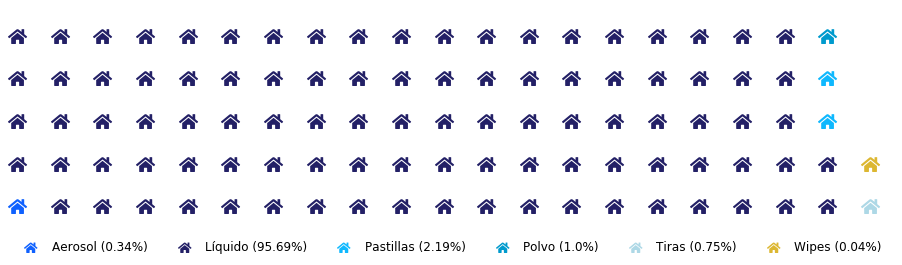

In [57]:
data=dict(df_sub_cant[['SubProduto','Porc']].values)
fig = plt.figure(
    figsize=(14,8),
    FigureClass=Waffle, 
    rows=5,
    values=data, 
    colors=("#0F61FE", "#232066", "#0FB8FE",'#009ACD','#ADD8E6',"#DCB732"),
    #legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='home', icon_size=17, 
    icon_legend=True,
    labels=["{0} ({1}%)".format(k,v) for k,v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.25), 'ncol': len(data), 'framealpha': 0,'fontsize' : 'large'}
)

In [58]:
df_sub_cant=df.groupby(['SubProduto'])['Precio_dolar'].mean().reset_index()

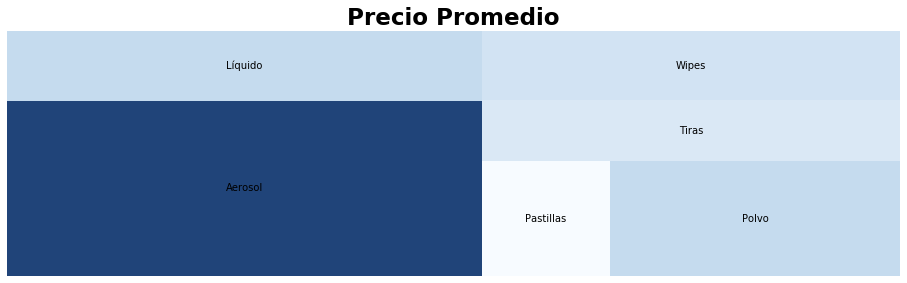

In [59]:
norm = matplotlib.colors.Normalize(vmin=min(df_sub_cant["Precio_dolar"]), vmax=max(df_sub_cant["Precio_dolar"]))
colors = [matplotlib.cm.Blues(norm(value)) for value in df_sub_cant["Precio_dolar"]]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
squarify.plot(label=df_sub_cant.SubProduto,sizes=df_sub_cant["Precio_dolar"], color = colors, alpha=.9)
plt.title("Precio Promedio",fontsize=23,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

- Es evidente la concentración hacia un tipo de Subproducto, el cual es el Líquido. Por otro lado, de la cantidad total comprada que fueron 48.056 unidades, alrededor de 45.984 unidades que constituyen el 95,7% corresponden a este subproducto. 

__4.3 SubProductos por País__

- Produndizando respecto a la variable cantidad comprada, se verá cómo fue el comportamiento por país.

In [22]:
df_cant_pais=df.groupby(['Pais'])['Quantidad comprada'].sum().reset_index()

In [23]:
df_cant_pais

,Pais,Quantidad comprada
0,Costa Rica,11724
1,El Salvador,8001
2,Guatemala,8113
3,Honduras,6206
4,Nicaragua,6660
5,Panamá,7352


__4.2. Mapa de Calor en geopandas__

In [23]:
fp = "América/América.shp"
map_df = gpd.read_file(fp)
crs={'init':'epsg:4326'}

In [24]:
map_df_ca=map_df[(map_df["PAÍS"] == "Costa Rica") | (map_df["PAÍS"] == "Panamá") | (map_df["PAÍS"] =="El Salvador") | (map_df["PAÍS"] =="Honduras") | (map_df["PAÍS"] =="Guatemala") | (map_df["PAÍS"] =="Nicaragua")]

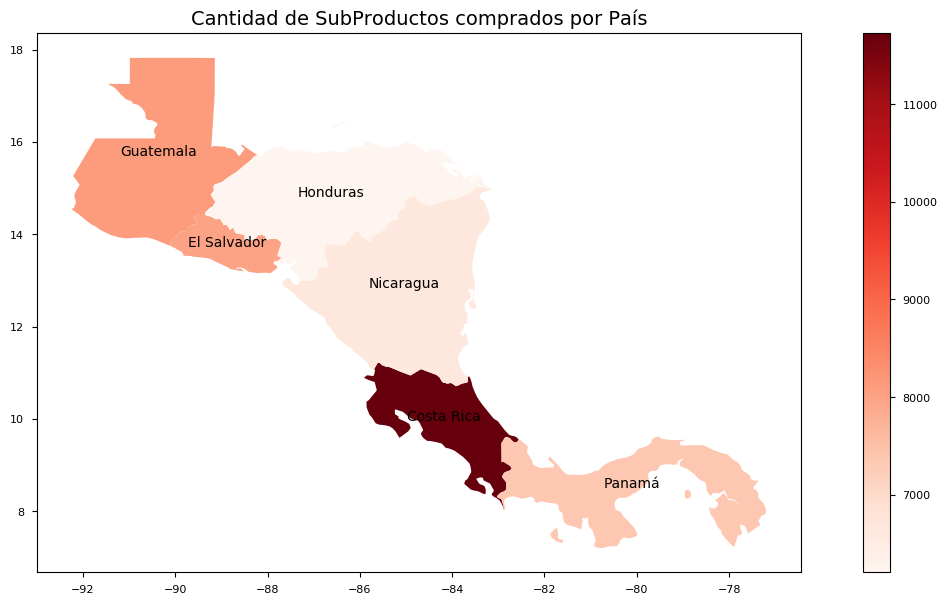

In [187]:
df_map=map_df_ca.merge(df_cant_pais, left_on='PAÍS', right_on='Pais',how='left')
df_map['geometry'] = df_map['geometry'].to_crs('epsg:4326')
ax=df_map.plot(column='Quantidad comprada', cmap ="Reds",legend=True,zorder=1,figsize=(16,7))
df_map.apply(lambda x: ax.annotate(s=x.PAÍS, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
#ax.set(xlim=(-78, -65), ylim=(-60, -15))
ax.set_title("Cantidad de SubProductos comprados por País",fontsize="14")
plt.show()

- Del gráfico anterior, cabe destacar que el país con mayores cantidades compradas es Costa Rica con 11.724 y el País con menos cantidades es Panamá con 7.352 

**4.3. Cantidad de Subproductos por País**

- Para tener mayor entendimiento de la variable objetivo, se hace necesario entender el consumo de cada subproducto a nivel país.

In [26]:
df_sub_cant_pais_g=df.groupby(['SubProduto','Pais'])['Quantidad comprada'].sum().reset_index()

In [27]:
df_sub_cant_pais = df.groupby(['SubProduto','Pais']).agg({'Quantidad comprada': 'sum'})
df_sub_cant_pais["%"] = df_sub_cant_pais.apply(lambda x:  100*x / x.sum())
df_sub_cant_pais

Quantidad comprada          %
SubProduto Pais                                      
Aerosol    Costa Rica                   46   0.095722
           El Salvador                  11   0.022890
           Guatemala                     1   0.002081
           Honduras                      3   0.006243
           Panamá                      102   0.212252
Líquido    Costa Rica                10885  22.650658
           El Salvador                7920  16.480772
           Guatemala                  7980  16.605627
           Honduras                   6139  12.774680
           Nicaragua                  6281  13.070168
           Panamá                     6779  14.106459
Pastillas  Costa Rica                  522   1.086233
           El Salvador                  31   0.064508
           Guatemala                    51   0.106126
           Honduras                     23   0.047861
           Nicaragua                   182   0.378725
           Panamá                      242   0.503579
Polvo      Costa Rica                  167   0.347511
           El Salvador                  18   0.037456
           Guatemala                    59   0.122773
           Honduras                     31   0.064508
           Nicaragua                   105   0.218495
           Panamá                      101   0.210171
Tiras      Costa Rica                   91   0.189362
           El Salvador                  21   0.043699
           Guatemala                    22   0.045780
           Honduras                      7   0.014566
           Nicaragua                    92   0.191443
           Panamá                      127   0.264275
Wipes      Costa Rica                   13   0.027052
           Honduras                      3   0.006243
           Panamá                        1   0.002081

**4.4. Grafica Subproducto por País**

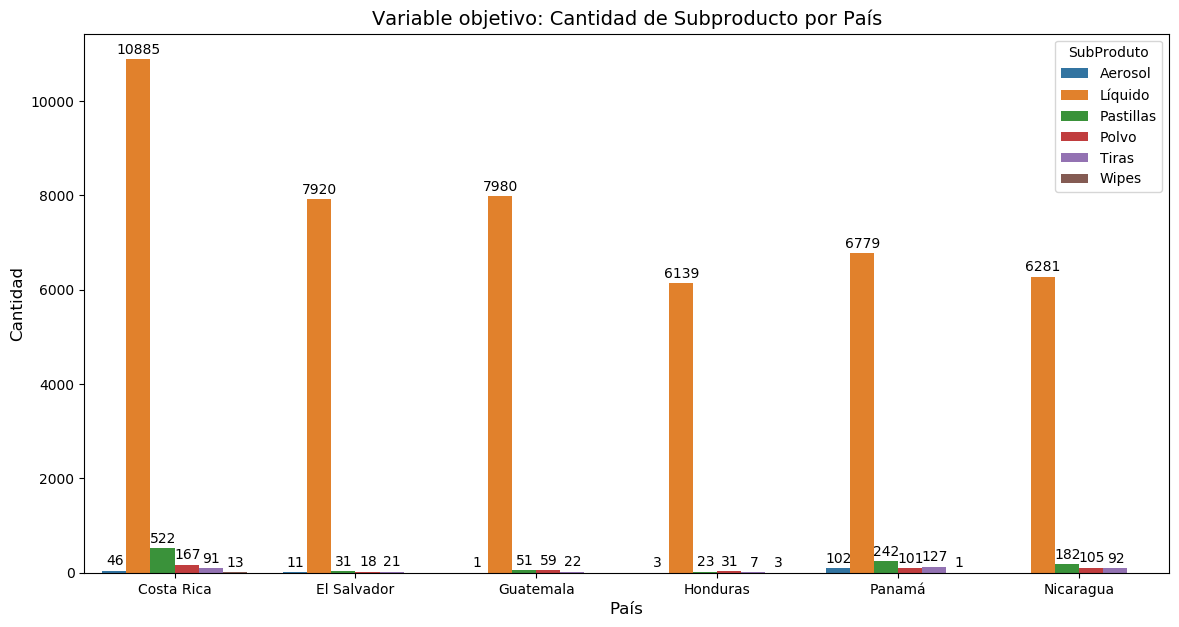

In [28]:
fig = plt.figure(figsize=(14,7))
Chart=sns.barplot(x='Pais',y='Quantidad comprada',hue='SubProduto',data=df_sub_cant_pais_g,ci=None)
for p in Chart.patches:
        Chart.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+350),
                    horizontalalignment='center', verticalalignment='top', rotation='horizontal', color= 'black')
Chart.set(xlabel='SubProducto', ylabel='Cantidad')
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('País', fontsize=12)
plt.title('Variable objetivo: Cantidad de Subproducto por País', fontsize=14)
plt.show()

- De lo anterior, al igual que en el caso general, todos los países prefieren los subproductos de tipo Líquido. Si bien la segunda preferencia a nivel general son de tipo pastillas, el caso de Guatemala se observan una mayor cantidad comprada de subproducto en formato polvo.

**4.5 Precio Promedio por Unidad respecto a cada País**
- Pasando a otro factor de cruce, se hace necesario revisar y tener en cuenta si existen diferencias sustanciales respecto al precio respecto a cada país. Inicialmente se hará una compración en general del total del dataset y luego se hará un detalle para cada subproducto y por cada país. A lo que sigue, se creará una nueva columna que almacenará el precio por unidad, ya que así no habrá diferencia para cada unidad de producto comprada por un hogar.

In [28]:
df['Precio Unidad'] = round(df['Precio_dolar']/df['Quantidad comprada'],3)

In [30]:
df_precio_prom_pais=df.groupby(['Pais'])['Precio Unidad'].mean().reset_index()

In [31]:
df_precio_prom_pais

,Pais,Precio Unidad
0,Costa Rica,1.197907
1,El Salvador,0.898321
2,Guatemala,1.172526
3,Honduras,0.868903
4,Nicaragua,0.675953
5,Panamá,1.746173


__4.6. Grafica País Precio Unidad Promedio__

In [32]:
df_precio_prom_pais['Precio Unidad']=round(df_precio_prom_pais['Precio Unidad'],2)

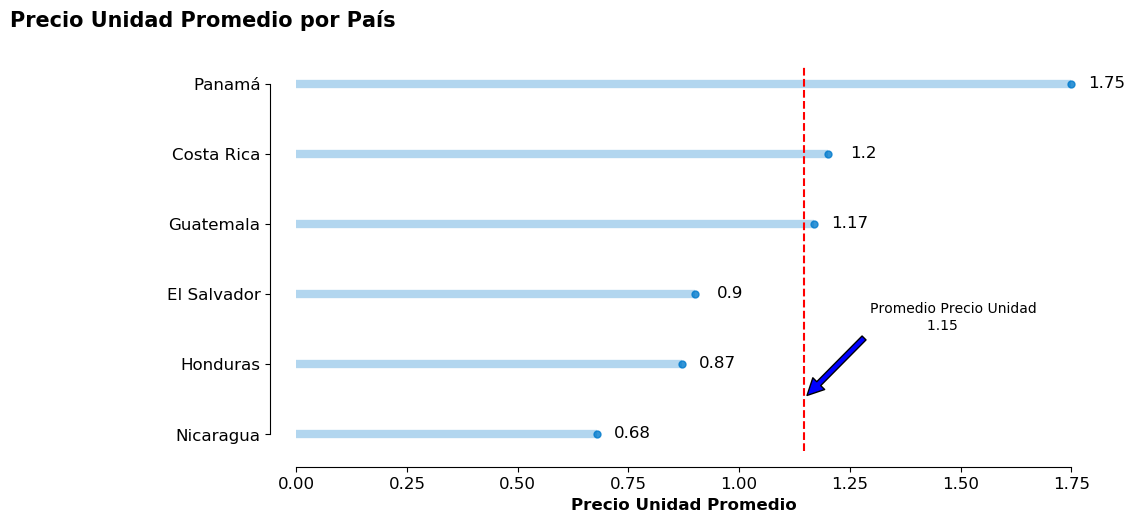

In [33]:
pu = pd.Series(df_precio_prom_pais['Precio Unidad'].tolist(), index=df_precio_prom_pais.Pais.tolist())
mean = df['Precio Unidad'].mean()
df_p = pd.DataFrame({'pu' : pu})
df_p = df_p.sort_values(by='pu',ascending=True)
my_range=list(range(1,len(df_p.index)+1))
fig, ax = plt.subplots(figsize=(11,5))
plt.hlines(y=my_range, xmin=0, xmax=df_p['pu'], color='#007ACC', alpha=0.3, linewidth=6)
plt.plot(df_p['pu'], my_range, "o", markersize=5, color='#007ACC', alpha=0.8)
ax.set_xlabel('Precio Unidad Promedio', fontsize=12, fontweight='black', color = 'black')
ax.set_ylabel('',color = 'black')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df_p.index)
fig.text(-0.1, 0.96, 'Precio Unidad Promedio por País', fontsize=15, fontweight='black', color = 'black')
for i, val in enumerate(df_p['pu'].values):
    plt.text(val+0.08, i+0.9, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

ax.axvline(mean, color='r', linestyle='--')  
ax.annotate('Promedio Precio Unidad\n'+'             '+str(round(mean,2)), xy=(mean, 1.5), xytext=(mean+0.15, 2.5),arrowprops=dict(facecolor='b', shrink=0.05))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))
plt.show()
#plt.savefig('hist2.png', dpi=300, bbox_inches='tight')

- El país con el precio mas caro por unidad de los subproductos es Panamá con __1.75 usd__, en cambió Nicaragua es el Páis cuyos subproductos se encuentran a menor valor 0.68. También se puede identificar respecto a la media de los precios, que Costa Rica y Guatemala se encuentran sobre este nivel y El Salvador y Honduras bajo esta referencia, cuyo valor es de 1.15 usd.

__4.7. Precio Promedio por Subproducto__ 

In [40]:
df_precio_prom_subpr=df.groupby(['SubProduto'])['Precio Unidad'].mean().reset_index()
df_precio_prom_subpr['Precio Unidad']=round(df_precio_prom_subpr['Precio Unidad'],2)

In [41]:
df_precio_prom_subpr

,SubProduto,Precio Unidad
0,Aerosol,2.93
1,Líquido,1.15
2,Pastillas,0.42
3,Polvo,1.13
4,Tiras,0.87
5,Wipes,0.66


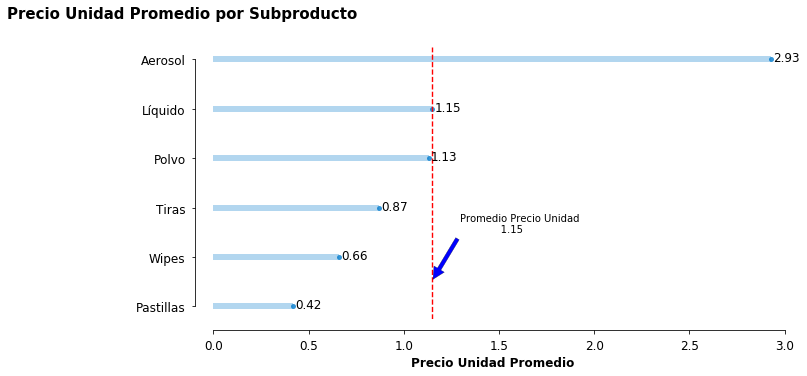

In [44]:
pu = pd.Series(df_precio_prom_subpr['Precio Unidad'].tolist(), index=df_precio_prom_subpr.SubProduto.tolist())
mean = df['Precio Unidad'].mean()
df_p = pd.DataFrame({'pu' : pu})
df_p = df_p.sort_values(by='pu',ascending=True)
my_range=list(range(1,len(df_p.index)+1))
fig, ax = plt.subplots(figsize=(11,5))
plt.hlines(y=my_range, xmin=0, xmax=df_p['pu'], color='#007ACC', alpha=0.3, linewidth=6)
plt.plot(df_p['pu'], my_range, "o", markersize=5, color='#007ACC', alpha=0.8)
ax.set_xlabel('Precio Unidad Promedio', fontsize=12, fontweight='black', color = 'black')
ax.set_ylabel('',color = 'black')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df_p.index)
fig.text(-0.1, 0.96, 'Precio Unidad Promedio por Subproducto', fontsize=15, fontweight='black', color = 'black')
for i, val in enumerate(df_p['pu'].values):
    plt.text(val+0.08, i+0.9, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

ax.axvline(mean, color='r', linestyle='--')  
ax.annotate('Promedio Precio Unidad\n'+'             '+str(round(mean,2)), xy=(mean, 1.5), xytext=(mean+0.15, 2.5),arrowprops=dict(facecolor='b', shrink=0.05))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))
plt.show()
#plt.savefig('hist2.png', dpi=300, bbox_inches='tight')

- El peso de la clase Líquido como subproducto, genera la línea media.
- Salta a la vista que el subproducto de tipo aerosol es el más caro de todos, llegando a ser un 250% más caro que el promedio de éstos. Por otra parte, el producto de tipo pastillas es el más barato con un valor que ronda los 0.42 usd por unidad.

**4.8. Precio Promedio por Unidad de SubProducto respecto a cada País**
- Lo siguiente enfocará el detalle del precio promedio de los subproductos para cada país.

In [34]:
df_precio_prom_subprod=df.groupby(['SubProduto','Pais'])['Precio Unidad'].mean().reset_index()

In [37]:
df_precio_prom_subprod_pivoted = df_precio_prom_subprod.pivot(index='SubProduto', columns='Pais', values='Precio Unidad').fillna(0)
df_precio_prom_subprod_pivoted

Pais,Costa Rica,El Salvador,Guatemala,Honduras,Nicaragua,Panamá
SubProduto,,,,,,
Aerosol,2.129763,1.166455,0.779000,0.301667,0.000000,3.564691
Líquido,1.226299,0.901679,1.178072,0.872669,0.690220,1.757224
Pastillas,0.474456,0.107000,0.160231,0.053071,0.256487,0.586096
Polvo,1.010349,1.397562,1.536560,0.935000,0.657379,1.501241
Tiras,0.732743,0.334353,0.661611,0.067167,0.381725,1.333939
Wipes,0.911500,0.000000,0.000000,0.000000,0.000000,0.020000


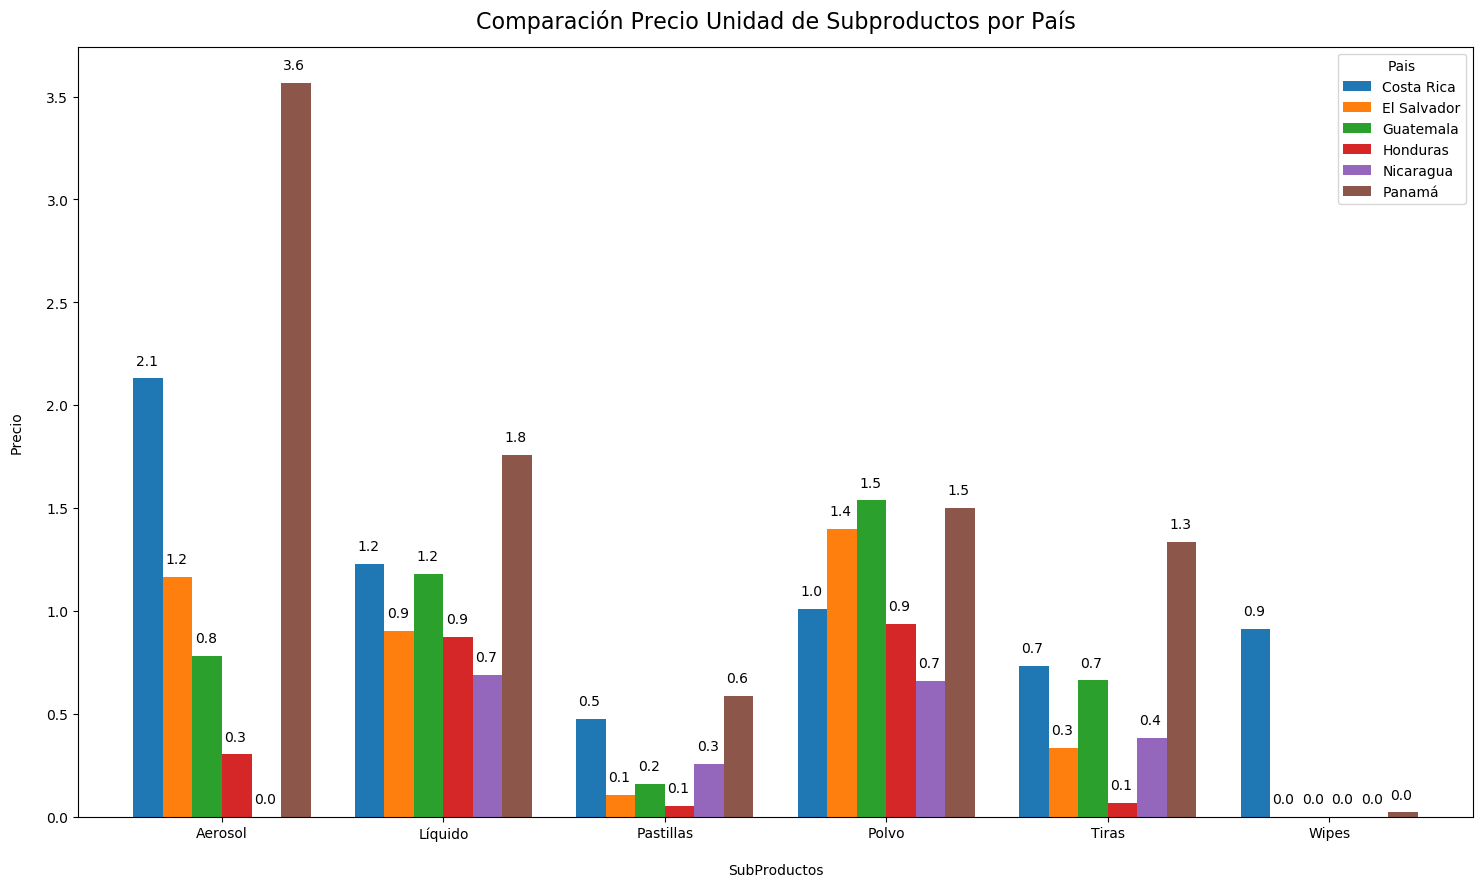

In [38]:
#fig = plt.figure(figsize=(18,10))
#plt.style.use('seaborn-poster')

Chart=df_precio_prom_subprod_pivoted.plot(kind='bar', figsize=(18, 10), rot=0,width=0.80) 
for p in Chart.patches:
        Chart.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+0.12),
                    horizontalalignment='center', verticalalignment='top', rotation=0, color= 'black')
plt.title("Comparación Precio Unidad Promedio de Subproductos por País", y=1.013, fontsize=16)
#Chart.set_title("'fivethirtyeight' style")
plt.xlabel("SubProductos", labelpad=16)
plt.ylabel("Precio", labelpad=16);

- Es interesante observar que el Aerosol en Panamá cuesta 3.6 usd que sería aproximadamente 3 veces superior al promedio de cualquier subproducto de su grupo país y de el resto de subproductos.  

__4.9. Variación del Promedio Unidad de Subproducto Líquido por País__
- Considerando el desbalance de clases que existe en los datos, sólo se indagará en este aspecto al subproducto líquido, a saber, se responderá a la siguiente situación ¿Cuán diferente es el precio de un limpiador de tipo líquido en cada país respecto al promedio ? 

In [39]:
df_t=df_precio_prom_subprod.copy()

In [40]:
df_t_liq=df_t[df_t['SubProduto']=='Líquido']
df_t_liq

,SubProduto,Pais,Precio Unidad
5,Líquido,Costa Rica,1.226299
6,Líquido,El Salvador,0.901679
7,Líquido,Guatemala,1.178072
8,Líquido,Honduras,0.872669
9,Líquido,Nicaragua,0.690220
10,Líquido,Panamá,1.757224


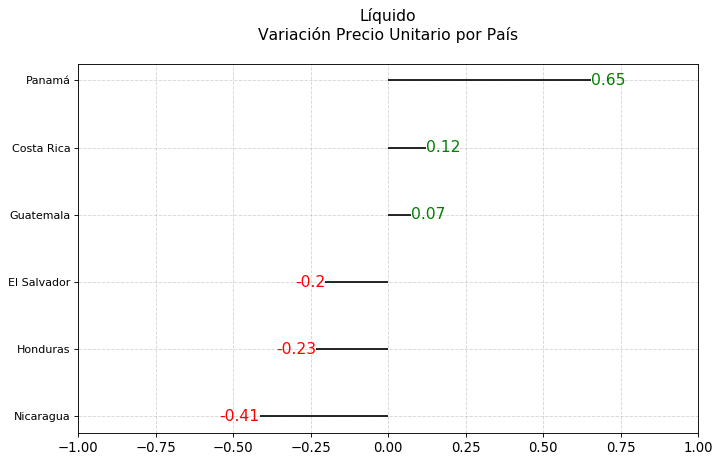

In [41]:
plt.style.use('default')
x = df_t_liq.loc[:, ['Precio Unidad']]
df_t_liq['Precio Unidad_z'] = (x- x.mean())
df_t_liq['colors'] = ['red' if x < 0 else 'green' for x in df_t_liq['Precio Unidad_z']]
df_t_liq=df_t_liq.sort_values('Precio Unidad_z').reset_index()
#df_t_Aerosol=df_t_Aerosol

# Draw plot
plt.figure(figsize=(10,6), dpi= 80)
plt.hlines(y=df_t_liq.index, xmin=0, xmax=df_t_liq['Precio Unidad_z'])
for x, y, tex in zip(df_t_liq['Precio Unidad_z'], df_t_liq.index,df_t_liq['Precio Unidad_z']):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(df_t_liq.index, df_t_liq.Pais, fontsize=10)
plt.xticks(fontsize=12)
plt.title('Líquido\nVariación Precio Unitario por País\n', fontdict={'size':14})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-1, 1)
plt.show()

- Cómo se puede observar desde el gráfico, anterior podemos concluir que Panamá, Costa Rica y Guatemala tienen un precio superior a la media de 0.65 usd, 0.12 usd y 0,07 usd respectivamente. En cambio, El salvador, Honduras y Nicaragua sus valores respecto a la media de la región (1,15 usd ) son 0.2, 0.23 y 0.41 usd, más bajo que dicho estadístico.

**4.10. Distribución Precio por SubProducto**

- A continuación se determinará la distribución de los precios ("columna Precio dolar") de las compras realizadas por los hogares de la región.

In [181]:
def hist_box(df,col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(12,8))
    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode().get_values()[0]
    sns.boxplot(df[col], ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='orange', linestyle='-')
    
    #ax_box.set_xlim([0,2500])
    #ax.set_ylim([0,0.0000003])
    
    
    sns.distplot(df[col], ax=ax_hist,bins=500)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    ax_hist.axvline(mode, color='orange', linestyle='-')
    
    #ax_hist.set_xlim([0,2500])
    #ax_hist.set_ylim([0,0.001])
    
    
    #ax_hist.legend({'Mean':mean,'Median':median,'Mode':mode})
   
    orange_patch = mpatches.Patch(color='orange', label='mode: '+str(round(mode,3)))
    green_patch = mpatches.Patch(color='g', label='median: '+str(round(median,3)))
    red_patch = mpatches.Patch(color='r', label='mean: '+str(round(mean,3)))
    
    plt.legend(handles=[orange_patch,green_patch,red_patch])
    
    #plt.legend(fontsize=15)
    
    ax_box.set(xlabel='Variable: '+str(col)+" "+"\nMean: "+str(round(mean,2))+" Median: "+str(round(median,2)))
    if col=='Precio_dolar':
        ax_box.set_title("Distribución Precio de Subproductos")
        ax_box.set_xlim([0,25])
        ax_hist.set_xlim([-0.5,6])
        ax_hist.set_ylim([0,1])
    elif col=='Volumen':
        ax_box.set_title("Distribución Volumen de Subproductos")
        ax_box.set_xlim([0,15])
        ax_hist.set_xlim([0,15])
        ax_hist.set_ylim([0,0.7])
    else:
        ax_box.set_title("Distribución Valor de Subproductos")
        ax_box.set_xlim([0,0.05])
        ax_hist.set_xlim([0,0.05])
        ax_hist.set_ylim([0,200])
    plt.show()

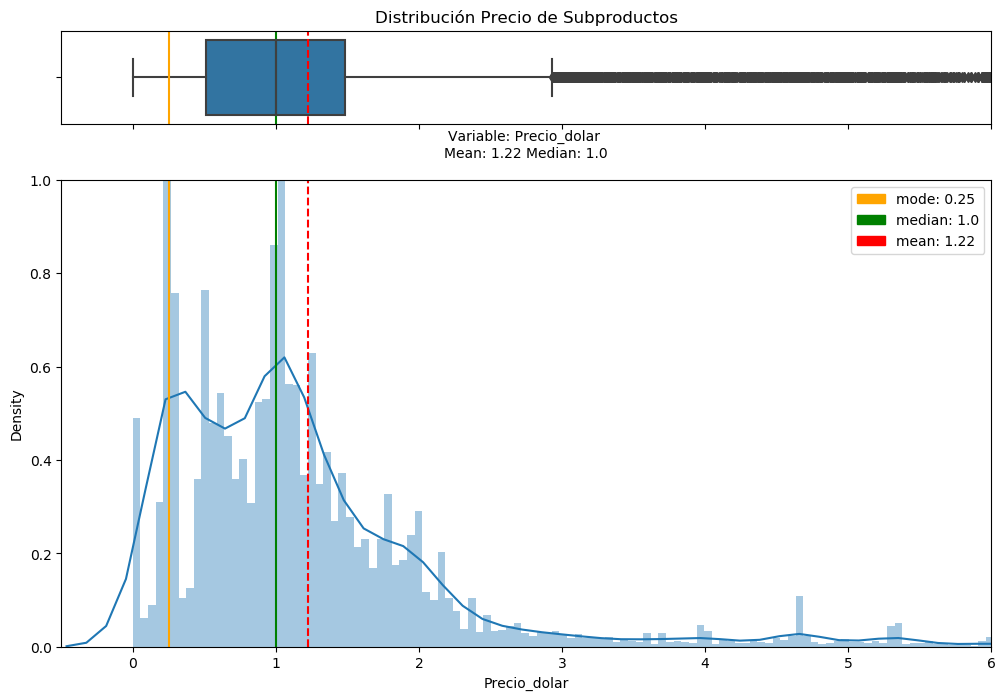

In [97]:
hist_box(df,'Precio_dolar')

- Se observa una leve asimetría positiva en la distribución que refleja el hecho que hay más precios de las compras están bajo la media de 1,22 usd de la región, más aún el 50% es menor igual a 1 usd por compra.
- A continuación se muestra el detalle de la distribución para cada precio de los subproductos.

**4.11. Distribución Precio por cada SubProducto**

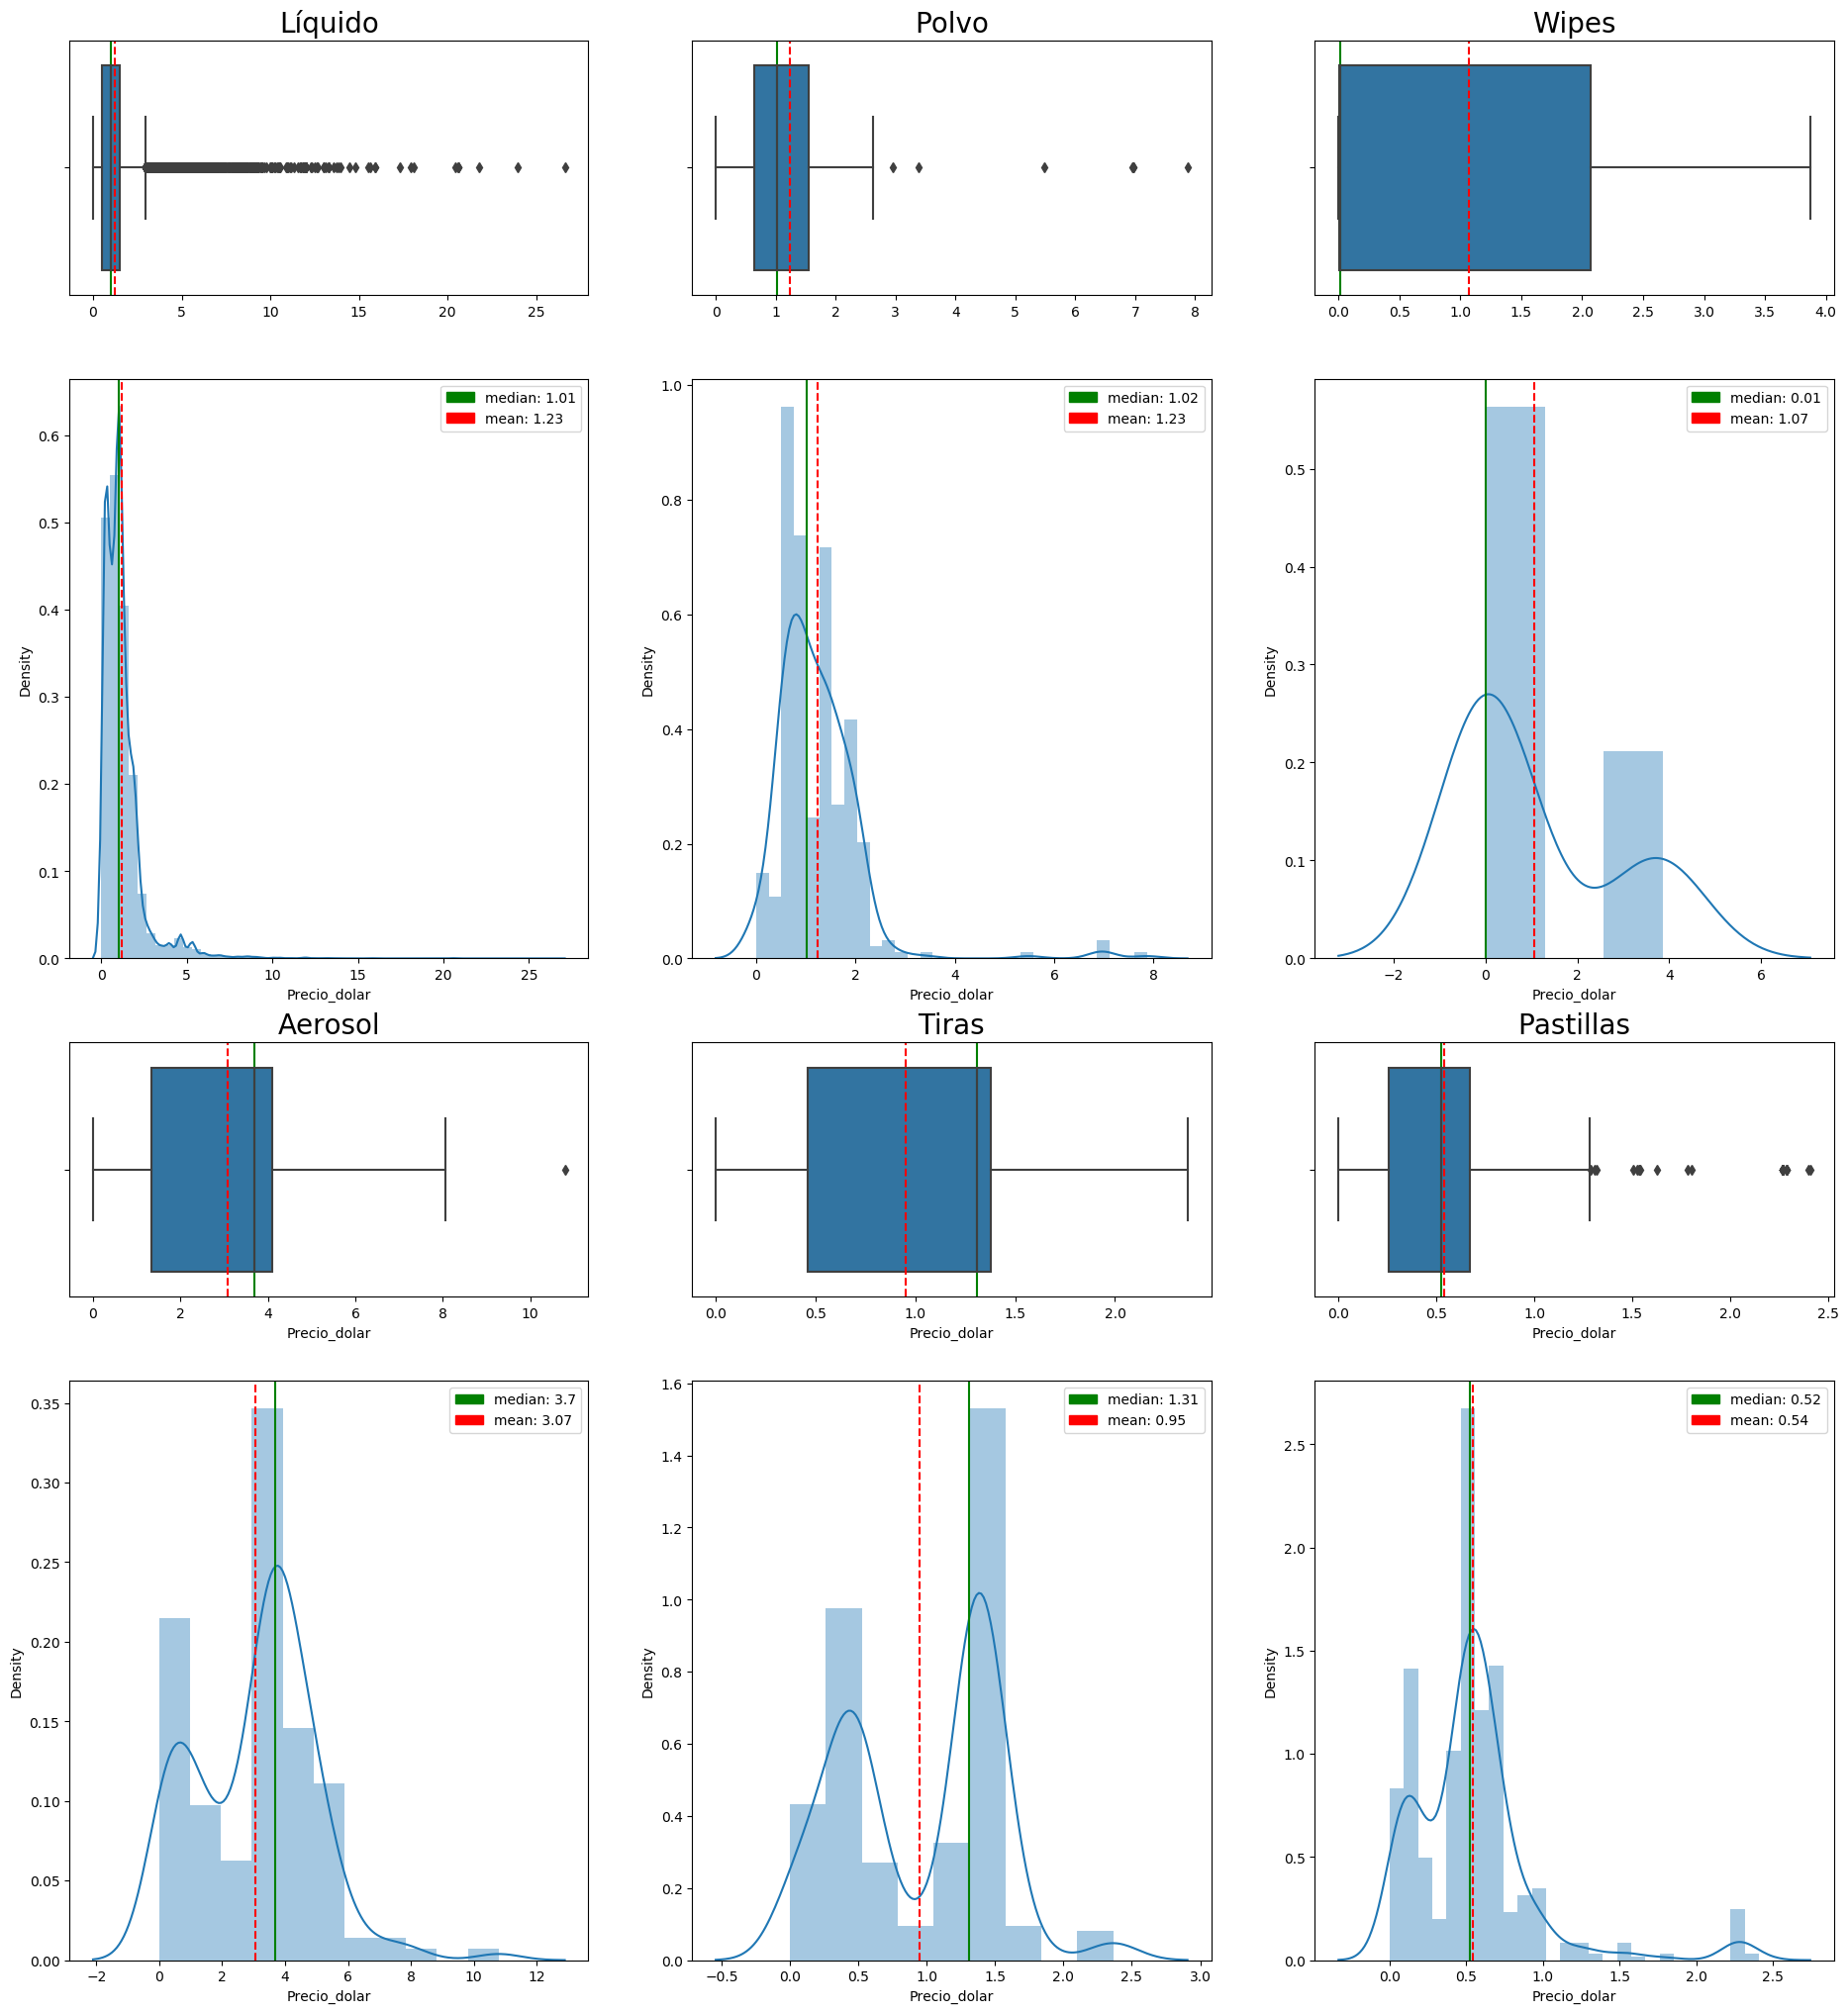

In [44]:
df_subset1 = df[['SubProduto','Precio_dolar']]
df_1 = df.SubProduto.unique().tolist()
fig, axes = plt.subplots(
        nrows=4, ncols=3, sharex=False,sharey=False,
        gridspec_kw={'height_ratios':[.11, 0.25,.11, 0.25]}, figsize = (23, 5)
        )
for i,c in enumerate(df_1[:3]):
    mean=df_subset1[df_subset1['SubProduto']==c]['Precio_dolar'].mean()
    median=df_subset1[df_subset1['SubProduto']==c]['Precio_dolar'].median()
    sns.boxplot(df_subset1[df_subset1['SubProduto']==c]['Precio_dolar'], ax=axes[0,i])
    axes[0,i].set(xlabel='') # elimina titulo eje x del boxplot
    axes[0,i].axvline(mean, color='r', linestyle='--') 
    axes[0,i].axvline(median, color='g', linestyle='-')
    axes[0,i].set_title(c,fontsize=20)
    #plt.title(c,size=20)
    sns.distplot(df_subset1[df_subset1['SubProduto']==c]['Precio_dolar'], ax=axes[1,i])
    
    axes[1,i].axvline(mean, color='r', linestyle='--') 
    axes[1,i].axvline(median, color='g', linestyle='-')
    axes[1,i].legend(['mean', 'median'])
    
    green_patch = mpatches.Patch(color='g', label='median: '+str(round(median,2)))
    red_patch = mpatches.Patch(color='r', label='mean: '+str(round(mean,2)))
    axes[1,i].legend(handles=[green_patch,red_patch])

plt.subplots_adjust(bottom=-3.0)
    
for i,c in enumerate(df_1[3:]):
    mean=df_subset1[df_subset1['SubProduto']==c]['Precio_dolar'].mean()
    median=df_subset1[df_subset1['SubProduto']==c]['Precio_dolar'].median()
    #plt.subplots_adjust(top=0.2)
    sns.boxplot(df_subset1[df_subset1['SubProduto']==c]['Precio_dolar'], ax=axes[2,i])
    axes[2,i].axvline(mean, color='r', linestyle='--') 
    axes[2,i].axvline(median, color='g', linestyle='-')
    axes[2,i].set_title(c,fontsize=20)
    sns.distplot(df_subset1[df_subset1['SubProduto']==c]['Precio_dolar'], ax=axes[3,i])
    axes[3,i].axvline(mean, color='r', linestyle='--') 
    axes[3,i].axvline(median, color='g', linestyle='-')
    #axes[3,i].legend(['mean', 'median'])
    green_patch = mpatches.Patch(color='g', label='median: '+str(round(median,2)))
    red_patch = mpatches.Patch(color='r', label='mean: '+str(round(mean,2)))
    axes[3,i].legend(handles=[green_patch,red_patch])

- De las distribuciones anteriores, el precio del subproducto liquido es el tiene a simple vista más outliers. No obstante, se aprecia que la mayor cantidad de los datos se ajustan a la media de 1,23 y mediana 1.01. El caso del subproducto wipes, su distribución refleja dos modas una entre su media y mediana y la otra se encuentra cerca de los 3 usd. El caso del Aerososl, Tiras y Pastillas no parece relevante el hecho de los outliers. Interesante observar que, la mitad de los hogares que usan Aerosol lo compran a un valor mayor de 3.7 usd.

**4.12. Distribución Volumen por SubProducto**
- En este apartado se revisará la distribución en los valores de Volumen y la cantidad de outliers, es decir precios que estén muy superior o inferior los registros de la población.

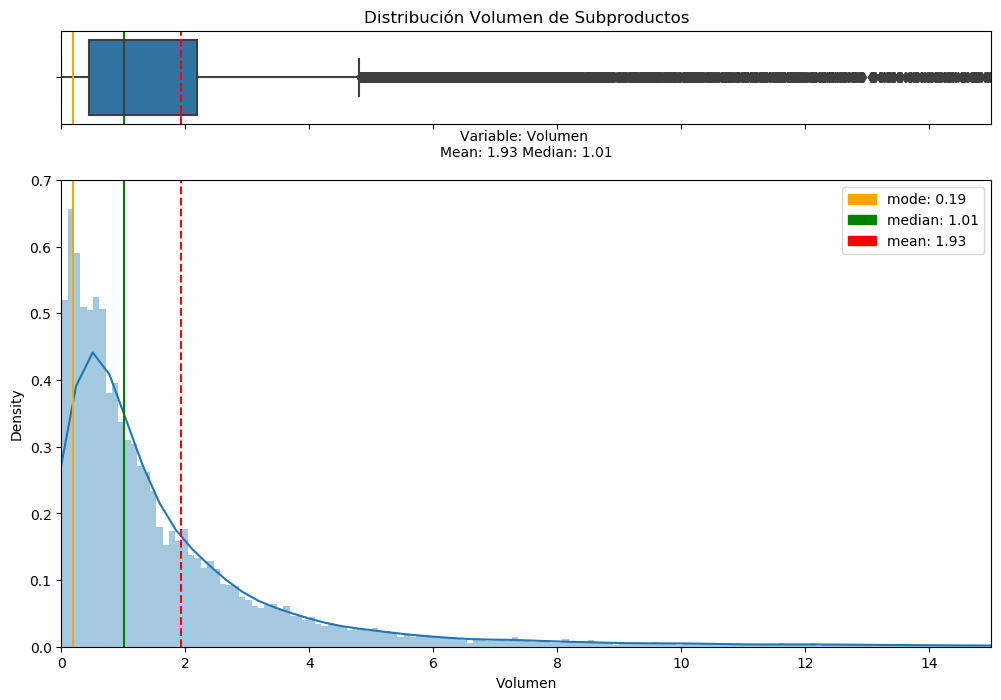

In [102]:
hist_box(df,'Volumen')

In [51]:
round(df.Volumen.quantile(0.80),2)

2.6

- La evidencia de la asimetría en la distribución anterior, se puede indicar que aproximadamente el 80% de los hogares prefieren volumenes menores a 2.6 aproximadamente. Ahora, se profundizará con dos métodos la manera de apreciar outliers y cuál de éstos podría mantener registros más homogeneos. A saber:

**4.13. Outliers Volumen: Método Z-score**
- Se considerarán outliers aquellos valores que sean superior o inferior a la medía más 3 veces la desviación estándar, es así como:

In [153]:
def vars_outliers(df,col):
    var_z_up=df[col].mean() + 3*df[col].std()
    var_z_low=df[col].mean() - 3*df[col].std()
    df_var_outliers = df[(df[col] > var_z_up) | (df[col] < var_z_low)]
    cant_outliers = df_var_outliers.shape[0]
    #df2= df.copy()
    df2=df[(df[col] < var_z_up) & (df[col] > var_z_low)]
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    plt.title("Con Outliers\nCantidad de Datos: "+str(df.shape[0])+"\n"+"Cantidad Outliers: "+str(cant_outliers))
    sns.boxplot(df[col])
    plt.subplot(2,2,2)
    plt.title("Sin Outliers\nCantidad de Datos: "+str(df2.shape[0]))
    sns.boxplot(df2[col])
    plt.show()

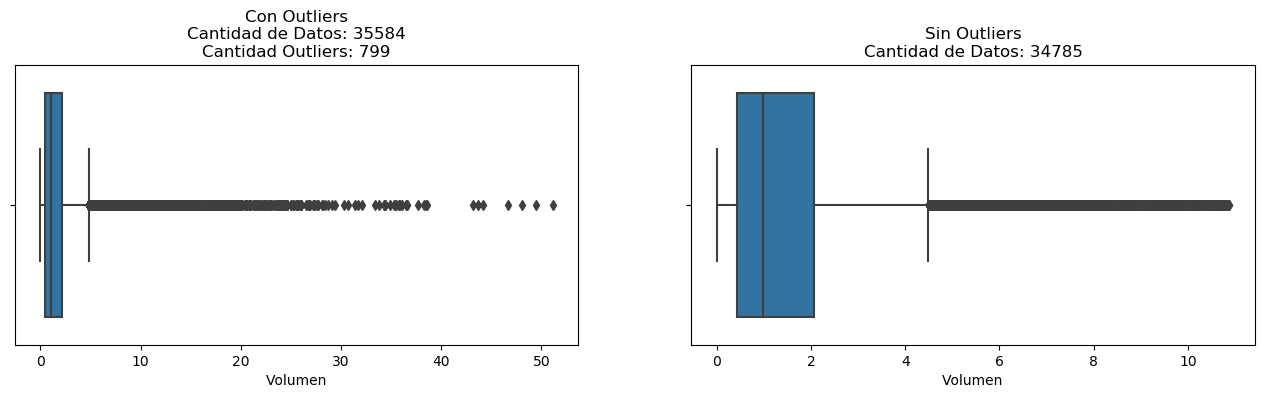

In [154]:
vars_outliers(df,'Volumen')

- Método Z-score da cuenta de 799 registros como outliers esto corresponden al 2% del total. Al obervar como sería el dataset sin outliers a partir de este método se desprende que aún persisten valores por sobre el límite superior del diagrama de cajón. A continuacion Método intercuartil (IQR)

**4.14. Outliers Volumen: Método IQR**
- Este método trata a un dato como outlier, a aquel que supera al percentil 75 mas 1.5 veces al rango intercuartil. Sólo se describe ese caso ya que no existen outliers en su límite inferior (como se aprecio en el método z-score).

In [160]:
def vars__perc_outliers(df,col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75-percentile25
    var_up = percentile75 + 1.5 * iqr
    var_low = percentile25 - 1.5 * iqr

    df_var_outliers = df[(df[col] > var_up) | (df[col] < var_low)]
    cant_outliers = df_var_outliers.shape[0]
    #df2= df.copy()
    df2=df[(df[col] < var_up) & (df[col] > var_low)]
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    plt.title("Con Outliers\nCantidad de Datos: "+str(df.shape[0])+"\n"+"Cantidad Outliers: "+str(cant_outliers))
    sns.boxplot(df[col])
    plt.subplot(2,2,2)
    plt.title("Sin Outliers\nCantidad de Datos: "+str(df2.shape[0]))
    sns.boxplot(df2[col])
    plt.show()

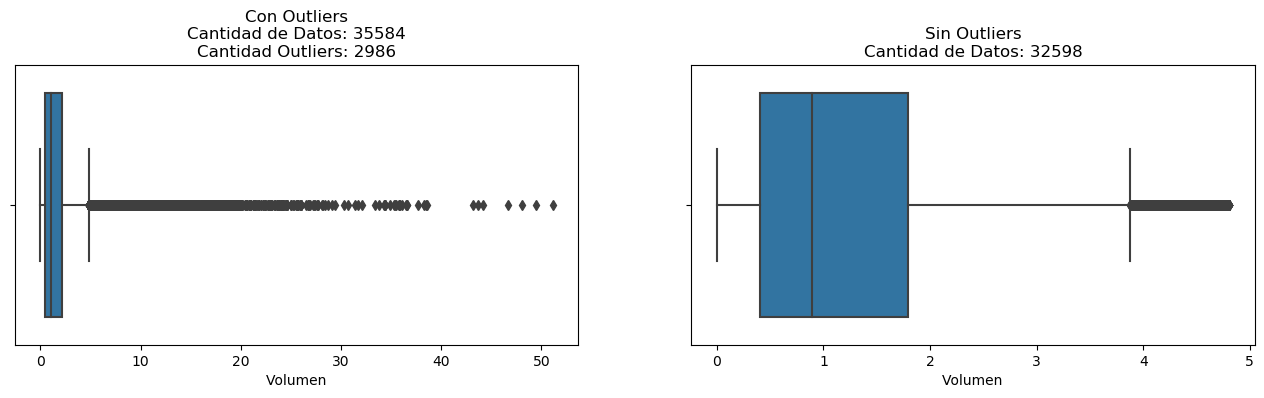

In [161]:
vars__perc_outliers(df,"Volumen")

- Evidentemente, este método considerá una mayor cantidad de registros como outliers, correspondientes al 8% del total. Por otra parte, todo parece indicar que bajo este método existe una mayor homogeneidad de los datos hacia los rangos del diagrama en cuestión.

**4.15. Distribución Volumen por cada SubProducto**
- Se revisará si existen diferencias en los formatos de volumen en cada Subroducto.

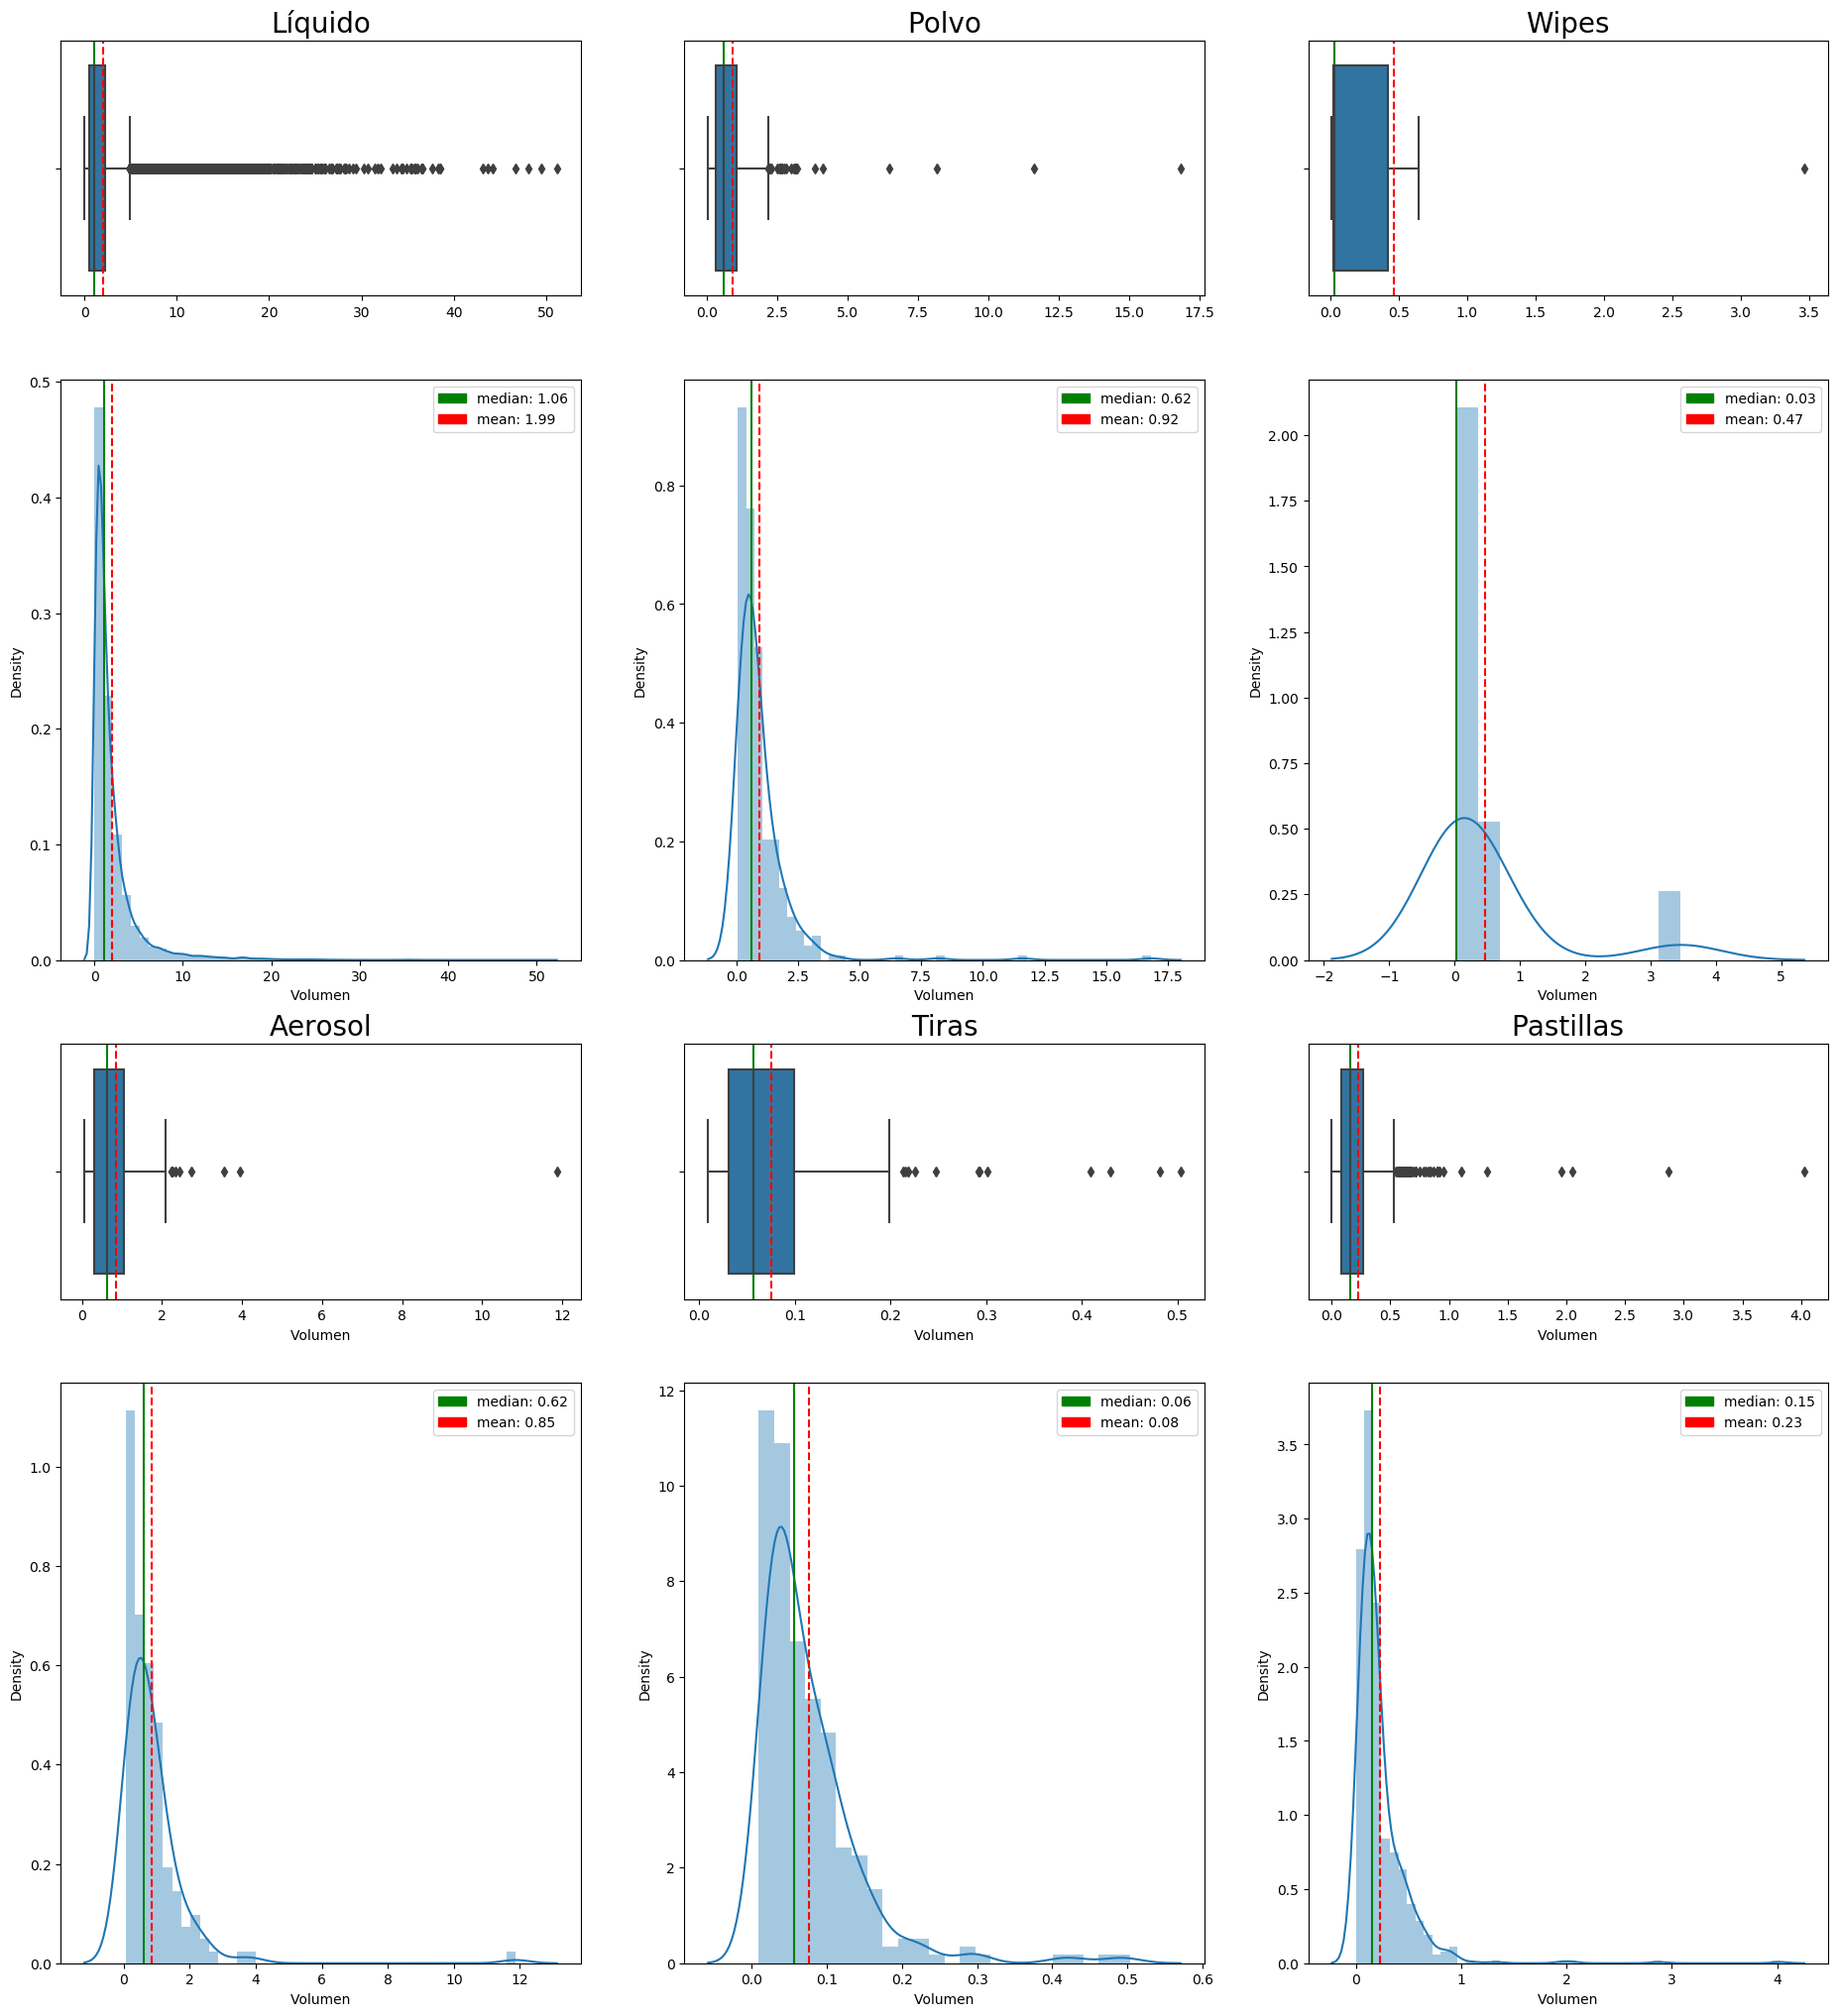

In [103]:
df_subset1 = df[['SubProduto','Volumen']]
df_1 = df.SubProduto.unique().tolist()
fig, axes = plt.subplots(
        nrows=4, ncols=3, sharex=False,sharey=False,
        gridspec_kw={'height_ratios':[.11, 0.25,.11, 0.25]}, figsize = (23, 5)
        )
for i,c in enumerate(df_1[:3]):
    mean=df_subset1[df_subset1['SubProduto']==c]['Volumen'].mean()
    median=df_subset1[df_subset1['SubProduto']==c]['Volumen'].median()
    sns.boxplot(df_subset1[df_subset1['SubProduto']==c]['Volumen'], ax=axes[0,i])
    axes[0,i].set(xlabel='') # elimina titulo eje x del boxplot
    axes[0,i].axvline(mean, color='r', linestyle='--') 
    axes[0,i].axvline(median, color='g', linestyle='-')
    axes[0,i].set_title(c,fontsize=20)
    #plt.title(c,size=20)
    sns.distplot(df_subset1[df_subset1['SubProduto']==c]['Volumen'], ax=axes[1,i])
    
    axes[1,i].axvline(mean, color='r', linestyle='--') 
    axes[1,i].axvline(median, color='g', linestyle='-')
    axes[1,i].legend(['mean', 'median'])
    
    green_patch = mpatches.Patch(color='g', label='median: '+str(round(median,2)))
    red_patch = mpatches.Patch(color='r', label='mean: '+str(round(mean,2)))
    axes[1,i].legend(handles=[green_patch,red_patch])

plt.subplots_adjust(bottom=-3.0)
    
for i,c in enumerate(df_1[3:]):
    mean=df_subset1[df_subset1['SubProduto']==c]['Volumen'].mean()
    median=df_subset1[df_subset1['SubProduto']==c]['Volumen'].median()
    #plt.subplots_adjust(top=0.2)
    sns.boxplot(df_subset1[df_subset1['SubProduto']==c]['Volumen'], ax=axes[2,i])
    axes[2,i].axvline(mean, color='r', linestyle='--') 
    axes[2,i].axvline(median, color='g', linestyle='-')
    axes[2,i].set_title(c,fontsize=20)
    sns.distplot(df_subset1[df_subset1['SubProduto']==c]['Volumen'], ax=axes[3,i])
    axes[3,i].axvline(mean, color='r', linestyle='--') 
    axes[3,i].axvline(median, color='g', linestyle='-')
    #axes[3,i].legend(['mean', 'median'])
    green_patch = mpatches.Patch(color='g', label='median: '+str(round(median,2)))
    red_patch = mpatches.Patch(color='r', label='mean: '+str(round(mean,2)))
    axes[3,i].legend(handles=[green_patch,red_patch])

- El Limpiador de tipo liquido, por simple inspección presenta una mayor dispersión asociada en sus valores de volume, alejandose con creces de sus principales estadísticos. Para el resto de los Limpiadores, no se observan una cantidad sustancial de outliers. Finalmente, la mayoría de los Subproductos presentan asimetría a la derecha, esto quiere decir que los hogares prefieren limpiadores en volumenes bajos. 

**4.16 Outliers Valor: Método Z-score**
- Analogamente como se revisó la distribución de outliers en la variable Volumen, se procederá para Valor. En este apartado, sólo se verá la distribución en general y el método de outliers.  

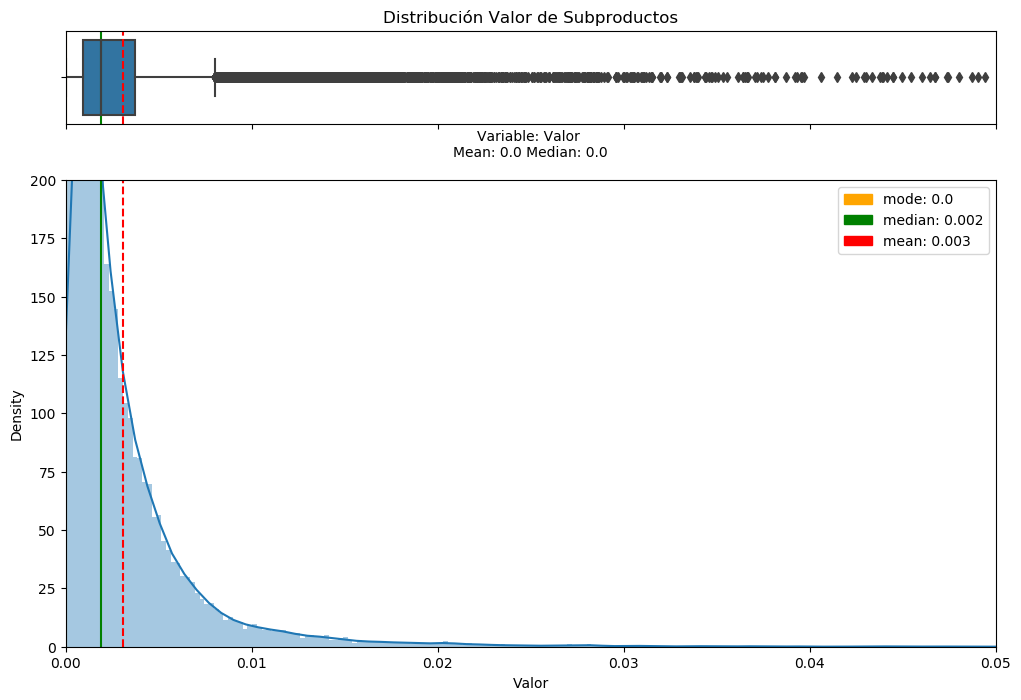

In [182]:
hist_box(df,'Valor')

- De manera similar a voluman, existe asimetría hacia la derecha, cuantificandose desde el 0.01 en adelante.

**4.17. Outliers Valor: Método Z score**

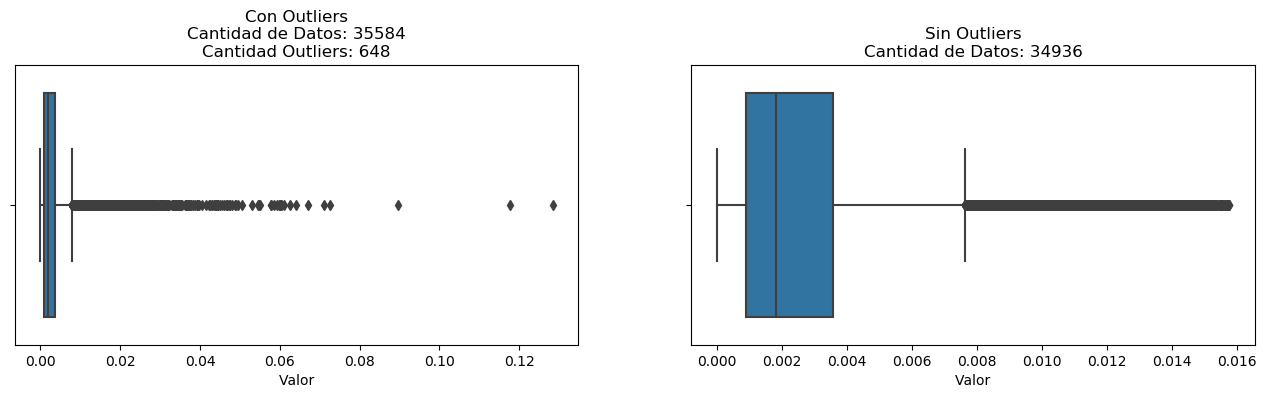

In [162]:
vars_outliers(df,'Valor')

El porcentaje de valores outliers detectados por el método zscore es de 1,8%. Y la muestra sin outliers sugiere la persistencia de algunos de ellos.

**4.18. Outliers Valor: Método IQR**

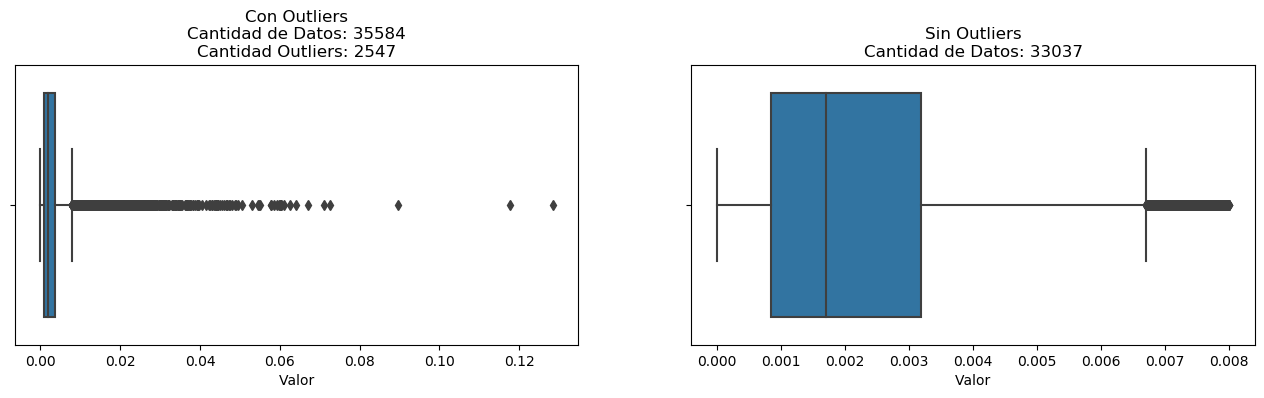

In [164]:
vars__perc_outliers(df,"Valor")

- Se detectaron 2547 outliers bajo el método IQR, correspondiente al 7% y los registros sin estos valores, dan cuenta de un pequeño grupo aunque inferior al valor 0,01.

**4.19 Compras por Año**
- Se relacionará la compras realizadas en conjunto con una variable temporal Año, para luego extender para cada subproducto y país.

In [45]:
df_dif_años_cantidad=df.groupby(["SubProduto","Año"])['Quantidad comprada'].sum().reset_index()

In [46]:
cols=["Año","Mes"]
df['mes-año'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df['mes-año']=pd.to_datetime(df['mes-año'])

In [47]:
#df['Año_s'] =df.Año.astype(str)
#df['Mes_s'] = df.Mes.astype(str)
#df['mes-año'] = df['Mes_s'] + " - " + df['Año_s']

In [48]:
df_dif_años_cantidad_pivoted = df_dif_años_cantidad.pivot(index='SubProduto', columns='Año', values='Quantidad comprada')
df_dif_años_cantidad_pivoted

Año,2019,2020
SubProduto,,
Aerosol,78,85
Líquido,28715,17269
Pastillas,512,539
Polvo,313,168
Tiras,208,152
Wipes,2,15


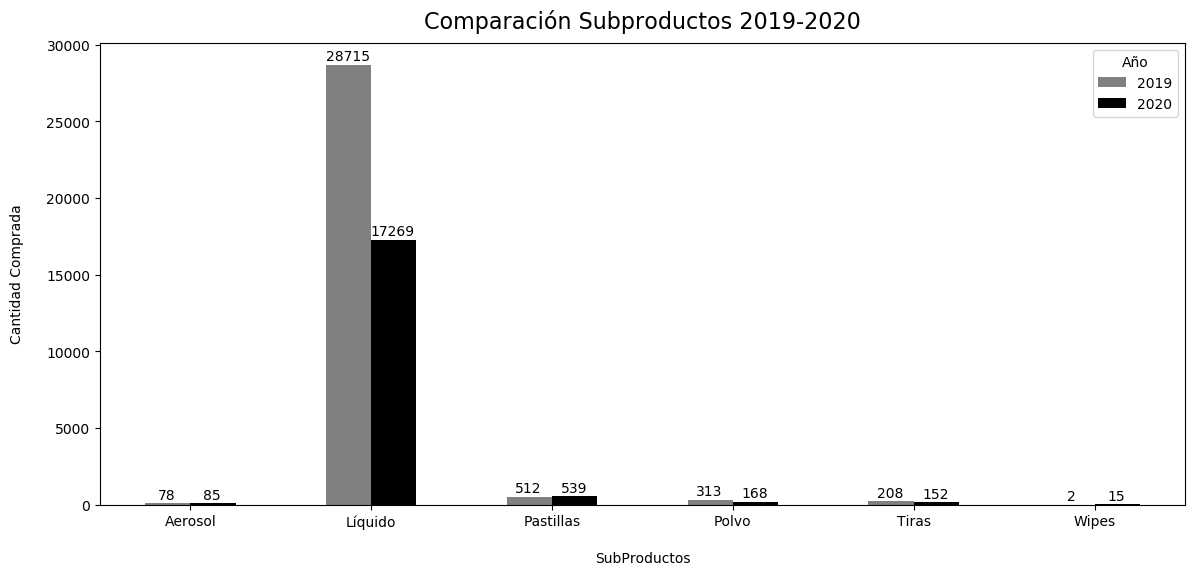

In [49]:
Chart=df_dif_años_cantidad_pivoted.plot(kind='bar', figsize=(14, 6), color=['gray', 'black'], rot=0) 
for p in Chart.patches:
        Chart.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+1000),
                    horizontalalignment='center', verticalalignment='top', rotation='horizontal', color= 'black')
plt.title("Comparación Subproductos 2019-2020", y=1.013, fontsize=16)
plt.xlabel("SubProductos", labelpad=16)
plt.ylabel("Cantidad Comprada", labelpad=16);

- Hay una mayor cantidad de productos comprados en 2019, antes de la pandemia. Este hecho se sostiene por la cantida de limpiadores liquidos comprados en este año un total de 28716 versus 17269 para 2020 e inicios de esta. Cabe resaltar el hecho, que Aerosol, pastillas y wipes aumentaron en la compras de los hogares para estos periodos.

In [50]:
df_dif_años_precio=df.groupby(["SubProduto","Año"])['Precio Unidad'].mean().reset_index()

In [51]:
df_dif_años_precio_pivoted = df_dif_años_precio.pivot(index='SubProduto', columns='Año', values='Precio Unidad')
df_dif_años_precio_pivoted

Año,2019,2020
SubProduto,,
Aerosol,3.058400,2.793708
Líquido,1.099323,1.245541
Pastillas,0.434932,0.410733
Polvo,1.137680,1.107882
Tiras,0.920722,0.799000
Wipes,0.006000,0.811111


**4.19. Precio por Año**

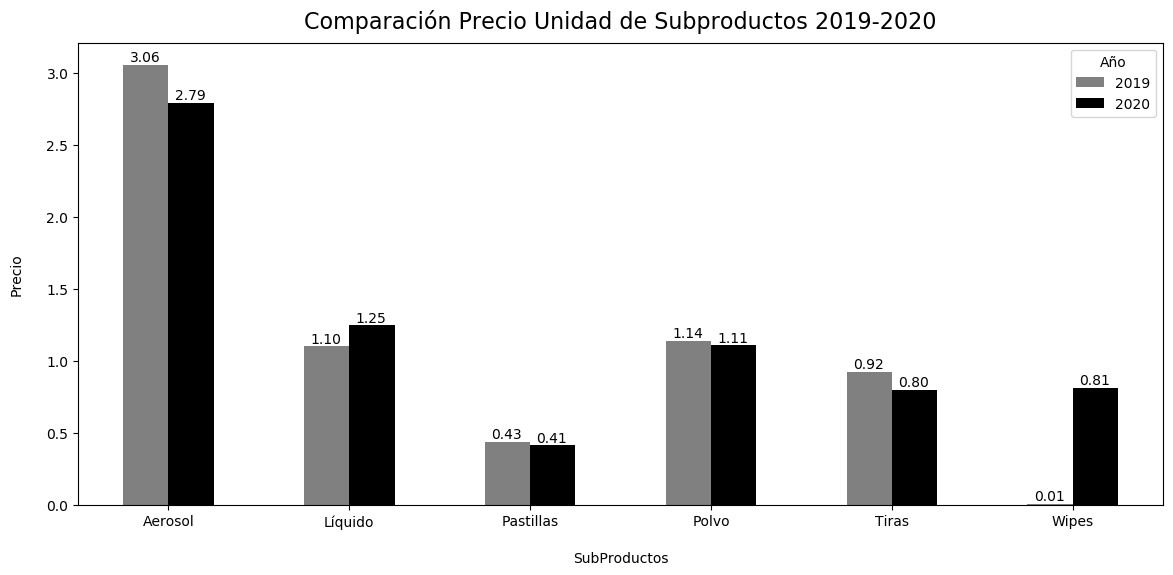

In [52]:
Chart=df_dif_años_precio_pivoted.plot(kind='bar', figsize=(14, 6), color=['gray', 'black'], rot=0) 
for p in Chart.patches:
        Chart.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+0.1),
                    horizontalalignment='center', verticalalignment='top', rotation='horizontal', color= 'black')
plt.title("Comparación Precio Unidad de Subproductos 2019-2020", y=1.013, fontsize=16)
plt.xlabel("SubProductos", labelpad=16)
plt.ylabel("Precio", labelpad=16);

- Otra situación a evidenciar, es que no se aprecian diferencias sustanciales en los precios en estos años. El caso del aerosol su precio se reduce cerca de un 10% y para el Liquido aumenta en un 14%. El caso del Wipes puede generar sezgo la poca cantidad de registros que se tienen, por ahora no se hará mayor análisis al respecto.

**4.20. Precio por Año-Mes**

In [61]:
#df_dif_años_cantidad=df.groupby(["SubProduto","Año"])['Quantidad comprada'].sum().reset_index()

In [55]:
df_años_cantidad_mes_año=df.groupby(["SubProduto","mes-año"])['Quantidad comprada'].sum().reset_index()

In [56]:
df_años_cantidad_mes_año

,SubProduto,mes-año,Quantidad comprada
0,Aerosol,2019-05-01,7
1,Aerosol,2019-06-01,1
2,Aerosol,2019-07-01,8
3,Aerosol,2019-08-01,5
4,Aerosol,2019-09-01,12
...,...,...,...
64,Tiras,2020-05-01,19
65,Wipes,2019-05-01,2
66,Wipes,2020-03-01,3
67,Wipes,2020-04-01,3


In [57]:
df_años_cantidad=df.groupby(["SubProduto","mes-año"])['Quantidad comprada'].sum().reset_index()

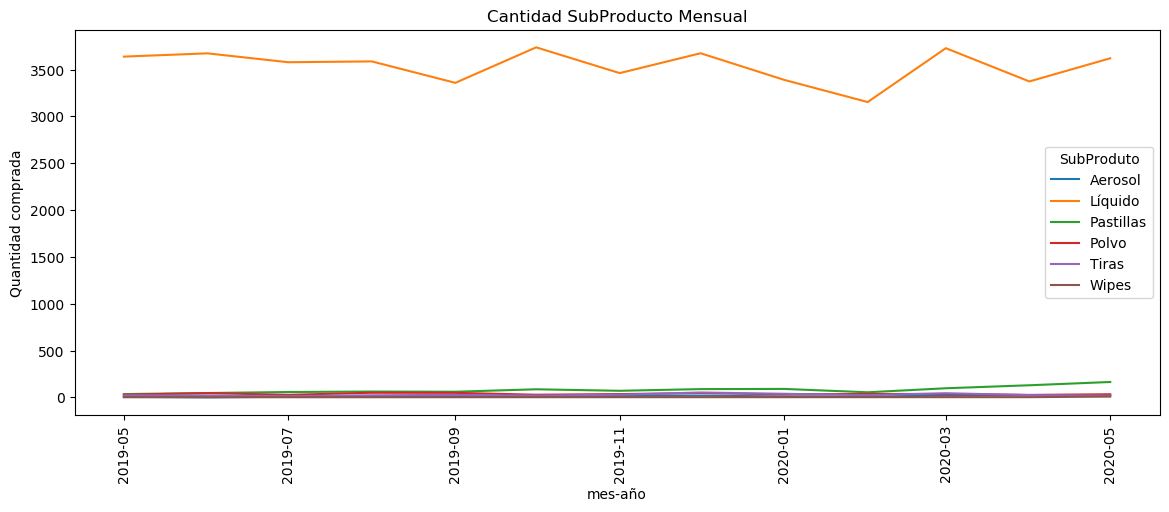

In [58]:
fig = plt.figure(figsize=(14,5))
ax=sns.lineplot('mes-año', 'Quantidad comprada', ci=None, hue='SubProduto', data=df_años_cantidad,sort=True)
plt.xticks(rotation=90)
plt.title("Cantidad SubProducto Mensual")
plt.show()

- Conforme pasaron los meses no se ve una clara tendencia de los precios, salvo hacia finales del preiodo estudiado las Pastillas se separan del conjunto de los otros limpiadores. Por su parte, la cantidad comprada en líquido se mantiene entre rangos de los 3000 - 4000 unidades durante el periodo.

**4.21. Precio por Año y País**

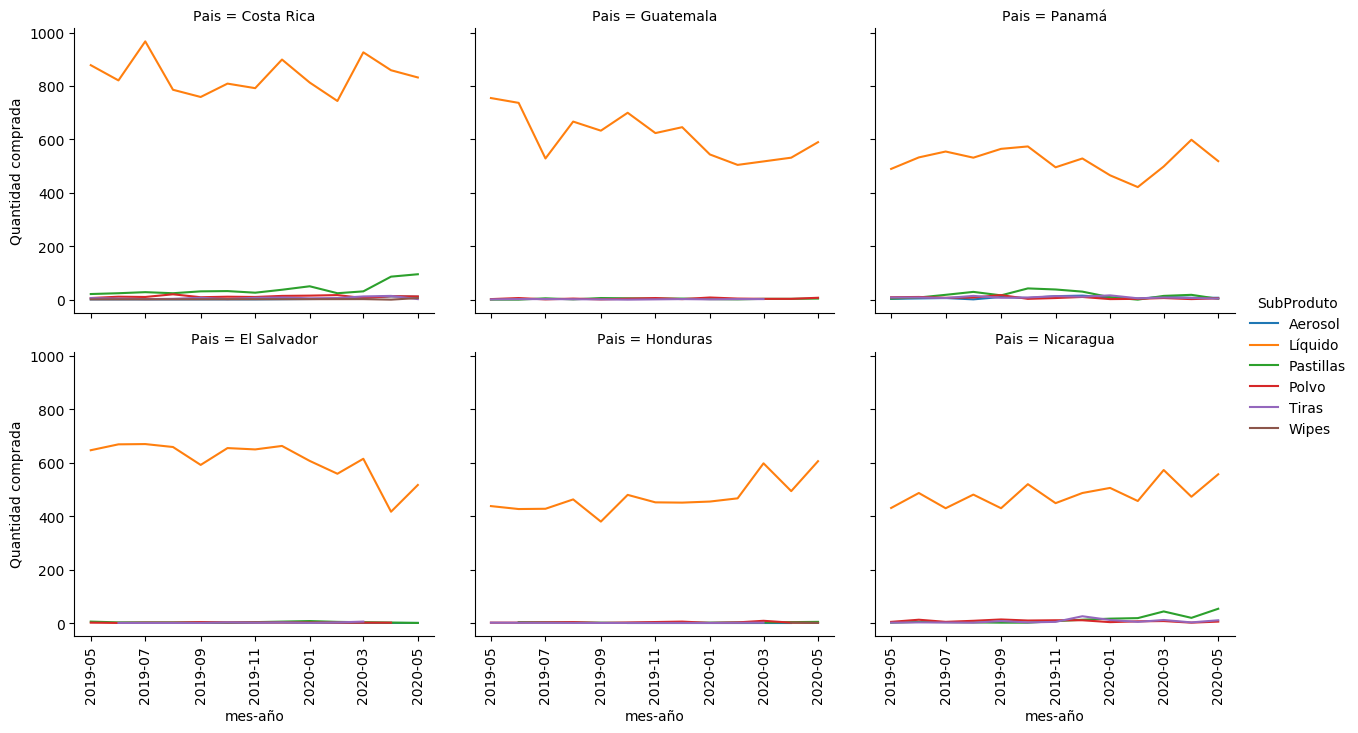

In [59]:
#fig = plt.figure(figsize=(10,12))
df_años_cantidad_pais=df.groupby(["SubProduto","mes-año","Pais"])['Quantidad comprada'].sum().reset_index()
g = sns.FacetGrid(df_años_cantidad_pais, col='Pais',col_wrap=3, hue='SubProduto',height=3.5, aspect=1.2)
plt.title("Cantidad Subproducto Mensual por País")
g = g.map(sns.lineplot, 'mes-año', 'Quantidad comprada', ci=None).add_legend()

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

plt.show()

- Es interesante el desglose por país, en este caso podemos ver aspectos distintos en las tendencias el caso de Guatemala y El salvador, ha sido bajista la cantidad comprada conforme el paso del tiempo. Sin embargo, en Honduras se presenta un leve aumentos. El resto de los países no muestran una clara evidencia a cierta tendencia.

**4.22. Precio Promedio SubProductos Año-Mes**

- Finalmente, se hará una revisión por el Precio y el paso de los meses desde mayo de 2019 a mayo de 2020.

In [71]:
df_años_precio_año_mes=df.groupby(["SubProduto","mes-año"])['Precio Unidad'].mean().reset_index()

In [72]:
df_años_precio_año_mes

,SubProduto,mes-año,Precio Unidad
0,Aerosol,2019-05-01,1.935857
1,Aerosol,2019-06-01,0.799000
2,Aerosol,2019-07-01,3.872875
3,Aerosol,2019-08-01,2.046000
4,Aerosol,2019-09-01,3.732636
...,...,...,...
64,Tiras,2020-05-01,0.578846
65,Wipes,2019-05-01,0.006000
66,Wipes,2020-03-01,0.005000
67,Wipes,2020-04-01,0.007000


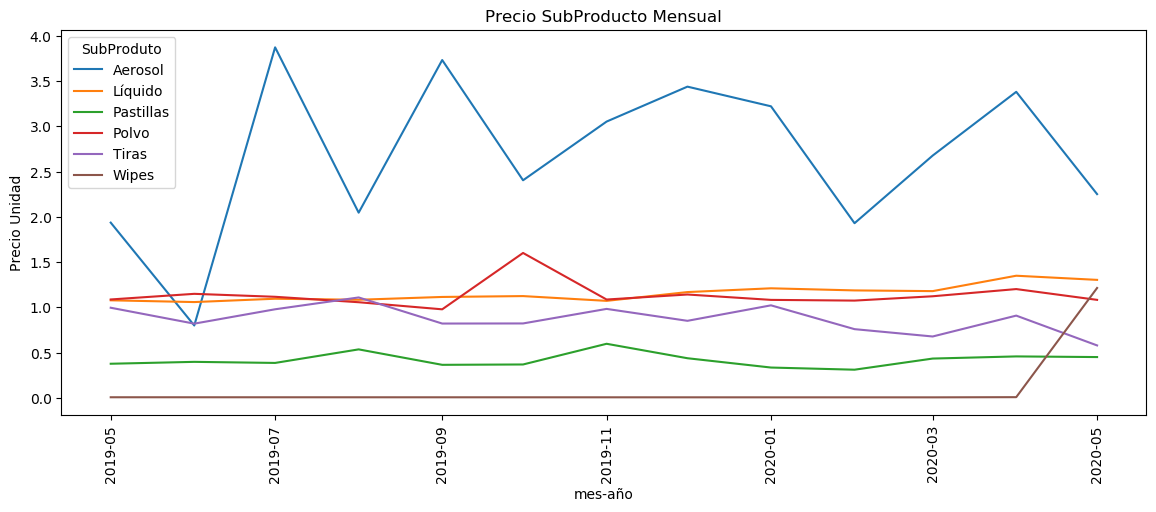

In [73]:
fig = plt.figure(figsize=(14,5))
ax1=sns.lineplot('mes-año', 'Precio Unidad', ci=None, hue='SubProduto', data=df_años_precio_año_mes,sort=True)
plt.xticks(rotation=90)
plt.title("Precio SubProducto Mensual")
plt.show()

- El limpiador de tipo Aerosol es el subproducto cuyo precio unidad promedio es el más oscilante, el resto de los productos se mantienen estables. Se observa un aumento del 50% en el precio unidad del limpiador en tipo Polvo para Octubre de 2019.

**4.23. Precio Promedio SubProductos Año-Mes y País**

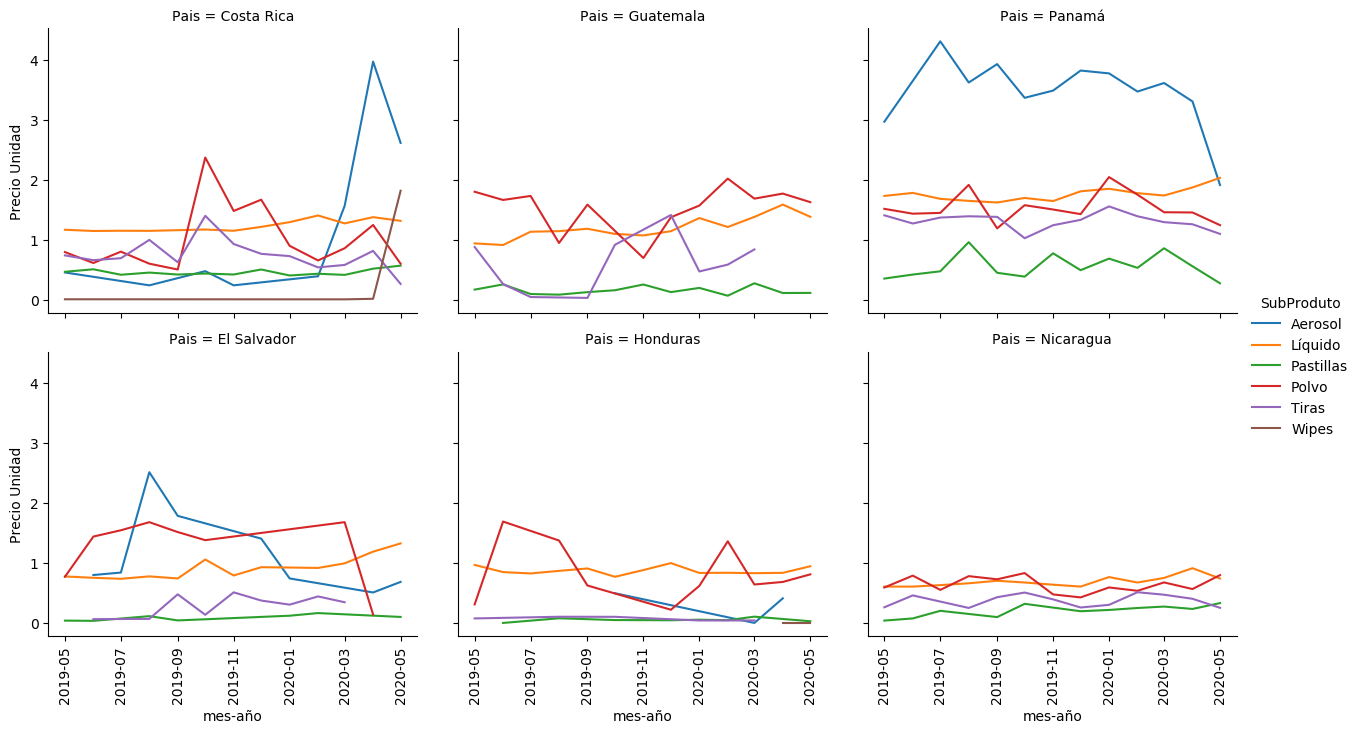

In [75]:
#fig = plt.figure(figsize=(10,12))
df_años_precio_pais=df.groupby(["SubProduto","mes-año","Pais"])['Precio Unidad'].mean().reset_index()
g = sns.FacetGrid(df_años_precio_pais, col='Pais',col_wrap=3, hue='SubProduto',height=3.5, aspect=1.2)
plt.title("Precio Promedio Subproducto Mensual por País")
g = g.map(sns.lineplot, 'mes-año', 'Precio Unidad', ci=None).add_legend()

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

plt.show()

- El desgloce de este apartado por País, se puede indicar que en el caso de Costa Rica hubo un aumento sustancial del precio unidad del aerosol, esto ocurre en febrero 2020. Otro hallazgo, que es opuestoal hecho anterior, es la caída del precio del aerosol en Panammá en mayo 2020. Nicaragua, es el país donde los precios parecen estabilizarse respecto a la variable año-mes.

__5. Conclusión.__
- Los registros obtenidos desde el dataset, mostraron una data consagrada sin datos nulos y sin necesidad de aplicar mayores técnicas de limpieza, sólo fue necesario alguna recodificación de ciertas clases, para tener más claridad en las graficas. 
- Si bien el objetivo de este trabajo fue responder algunas interrogantes planteadas desde un inicio, también se ha complementado con el cruce de otras variables para entender a cabalidad lo que ocurre con los Subprocductos, tratando de poner en evidencias diferencias en precio, cantidades compradas, volumen, país y alguna temporalidad. Así como también, el apoyo gráfico para demostrar algunos de los hallazgos presentados en este trabajo. 
- La sugerencia a futuro para este trabajo, es realizar un estudio solo para el caso de limpiador de tipo liquido, ya que alberga el 95% de los registros del dataset y hacer un trabajo paralelo para el resto de los subproductos.
- La cantidad de outliers encontrados para las variables dirigidas, dan cuenta de una cierta homogeneidad de los registros, y da la posibilidad de hacer un estudio basandose en registros sin outliers usando el método de rango intercuartil, y descartando un 7% de los datos iniciales.
- Para el caso de variables temporales, a priori la pandemia podría haber tomado un rol más diferenciador, no obstante, y salvo para algunos casos puntuales en donde solo se aprecian estas diferencias ya sea para el precio unidad como para la cantidad comprada.



__6. Bibliografía.__
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
- https://seaborn.pydata.org/
- https://medium.com/analytics-vidhya/a-beginners-guide-to-matplotlib-for-data-visualization-and-exploration-in-python-3fb32d03c3cd
- https://towardsdatascience.com/formating-and-visualizing-time-series-data-ba0b2548f27b
- https://towardsdatascience.com/a-complete-pandas-guide-2dc53c77a002